In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split

def split_and_copy_dataset(source_dir, train_dir, val_dir, val_size=0.2):
    # Create the base directories for train and val if they don't exist
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)

    # Loop through each class directory in the source dataset
    for class_name in os.listdir(source_dir):
        class_dir = os.path.join(source_dir, class_name)
        if os.path.isdir(class_dir):
            # Create class-specific directories for train and val sets
            os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
            os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
            
            # Get all image file paths in the current class directory
            images = [os.path.join(class_dir, image) for image in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, image))]

            # Split the images into train and validation sets
            train_files, val_files = train_test_split(images, test_size=val_size, random_state=42)

            # Copy the files into their respective directories
            for file in train_files:
                shutil.copy(file, os.path.join(train_dir, class_name, os.path.basename(file)))
            for file in val_files:
                shutil.copy(file, os.path.join(val_dir, class_name, os.path.basename(file)))

# Define your directories in /kaggle/working
source_dir = "/kaggle/input/dangerous-insects-dataset/farm_insects"  # Original dataset path (should contain class folders)
train_dir = "/kaggle/working/train"  # Path where the training data will be stored
val_dir = "/kaggle/working/val"      # Path where the validation data will be stored

# Split the dataset and copy the images to their respective directories
split_and_copy_dataset(source_dir, train_dir, val_dir)

# Hybrid Model - 1: ResNet18 + MobileNetV2

Preprocessing training images...
Preprocessing validation images...
Image preprocessing complete.
Number of classes: 15
Training ResNet50...


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 196MB/s]


Epoch 1/20: Train Acc: 0.2474, Val Acc: 0.5000, Train Loss: 2.5929, Val Loss: 2.2974
Saved best ResNet50 model with validation accuracy: 0.5000


Epoch 2/20: Train Acc: 0.5282, Val Acc: 0.6730, Train Loss: 1.9894, Val Loss: 1.3400
Saved best ResNet50 model with validation accuracy: 0.6730


Epoch 3/20: Train Acc: 0.6130, Val Acc: 0.7013, Train Loss: 1.4289, Val Loss: 0.9725
Saved best ResNet50 model with validation accuracy: 0.7013


Epoch 4/20: Train Acc: 0.6796, Val Acc: 0.7233, Train Loss: 1.1537, Val Loss: 0.8292
Saved best ResNet50 model with validation accuracy: 0.7233


Epoch 5/20: Train Acc: 0.7185, Val Acc: 0.7296, Train Loss: 0.9672, Val Loss: 0.8012
Saved best ResNet50 model with validation accuracy: 0.7296


Epoch 6/20: Train Acc: 0.7375, Val Acc: 0.7642, Train Loss: 0.8392, Val Loss: 0.7376
Saved best ResNet50 model with validation accuracy: 0.7642


Epoch 7/20: Train Acc: 0.7613, Val Acc: 0.7453, Train Loss: 0.7730, Val Loss: 0.7233


Epoch 8/20: Train Acc: 0.7867, Val Acc: 0.7547, Train Loss: 0.6766, Val Loss: 0.7197


Epoch 9/20: Train Acc: 0.8017, Val Acc: 0.7642, Train Loss: 0.5992, Val Loss: 0.6968


Epoch 10/20: Train Acc: 0.8430, Val Acc: 0.7799, Train Loss: 0.5416, Val Loss: 0.6736
Saved best ResNet50 model with validation accuracy: 0.7799


Epoch 11/20: Train Acc: 0.8414, Val Acc: 0.7893, Train Loss: 0.5173, Val Loss: 0.6629
Saved best ResNet50 model with validation accuracy: 0.7893


Epoch 12/20: Train Acc: 0.8493, Val Acc: 0.7862, Train Loss: 0.5110, Val Loss: 0.6811


Epoch 13/20: Train Acc: 0.8390, Val Acc: 0.7799, Train Loss: 0.4922, Val Loss: 0.6925


Epoch 14/20: Train Acc: 0.8818, Val Acc: 0.7799, Train Loss: 0.4038, Val Loss: 0.6839


Epoch 15/20: Train Acc: 0.8755, Val Acc: 0.7799, Train Loss: 0.3977, Val Loss: 0.6610


Epoch 16/20: Train Acc: 0.8858, Val Acc: 0.7673, Train Loss: 0.3917, Val Loss: 0.6986


Epoch 17/20: Train Acc: 0.8771, Val Acc: 0.7862, Train Loss: 0.4020, Val Loss: 0.7125


Epoch 18/20: Train Acc: 0.8921, Val Acc: 0.7830, Train Loss: 0.3601, Val Loss: 0.6734


Epoch 19/20: Train Acc: 0.9048, Val Acc: 0.7893, Train Loss: 0.3224, Val Loss: 0.7093


Epoch 20/20: Train Acc: 0.9017, Val Acc: 0.7830, Train Loss: 0.3344, Val Loss: 0.6853
Evaluating ResNet50...


Evaluating ResNet50: 100%|██████████| 20/20 [00:06<00:00,  3.33it/s]


ResNet50 Classification Report:
                                       precision    recall  f1-score   support

Africanized Honey Bees (Killer Bees)       0.95      0.95      0.95        20
                              Aphids       0.83      0.59      0.69        17
                           Armyworms       0.47      0.37      0.41        19
         Brown Marmorated Stink Bugs       0.90      0.83      0.86        23
                     Cabbage Loopers       0.94      0.71      0.81        21
                       Citrus Canker       1.00      0.95      0.98        21
             Colorado Potato Beetles       0.88      1.00      0.94        23
                         Corn Borers       0.71      0.74      0.72        23
                       Corn Earworms       0.76      0.86      0.81        22
                      Fall Armyworms       0.45      0.48      0.47        21
                         Fruit Flies       0.80      0.95      0.87        21
                        Spider

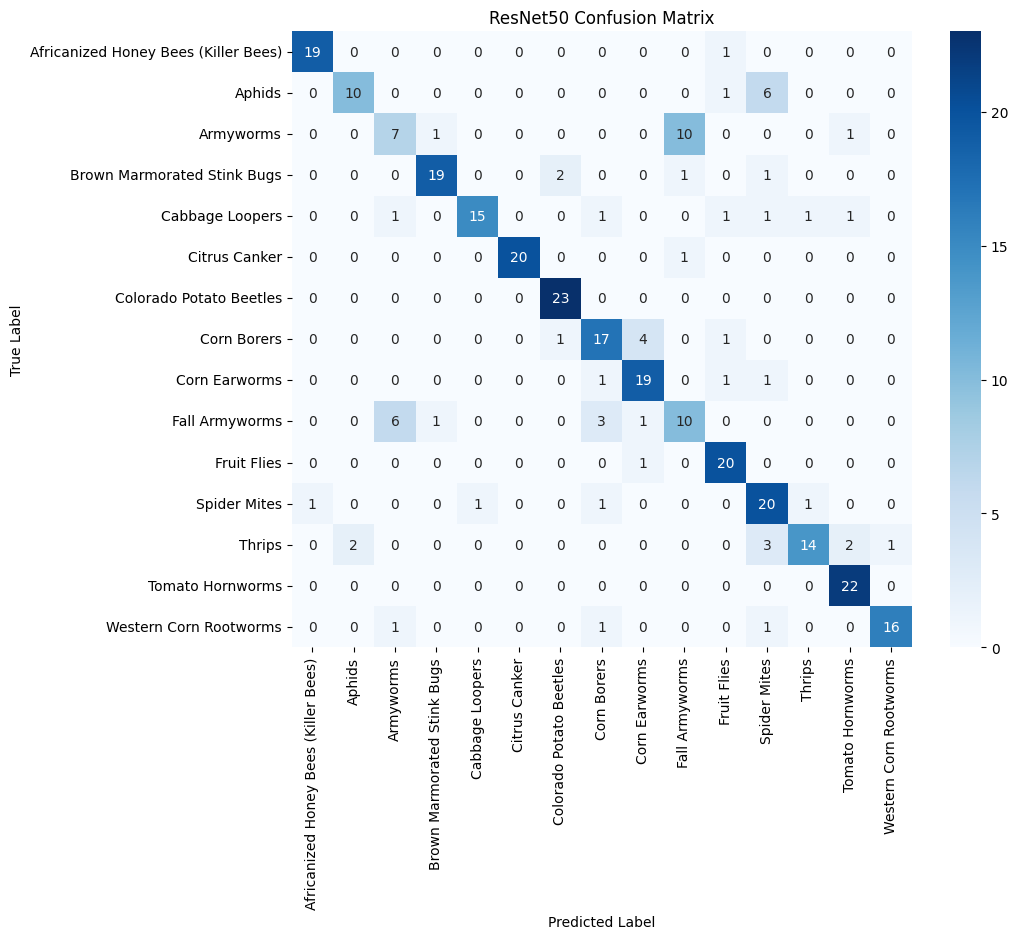

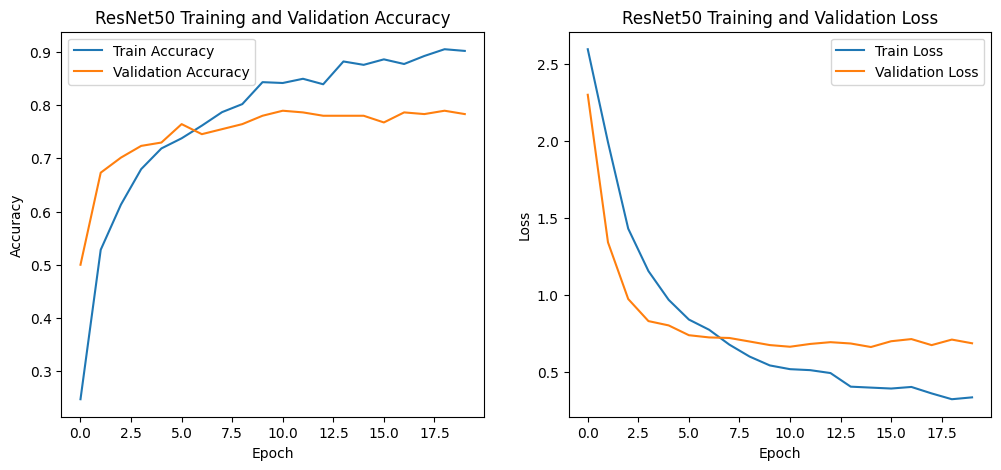

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from torchvision import models
from tqdm import tqdm
import os
from PIL import Image

# Set device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Image Preprocessing Script
def convert_to_rgb(image_dir):
    """
    Converts all images in a directory to RGB format.  Handles subdirectories.
    Correctly handles palette images with transparency.

    Args:
        image_dir (str): Path to the directory containing the images.
    """
    for root, _, files in os.walk(image_dir):  # Use os.walk to traverse subdirectories
        for filename in files:
            filepath = os.path.join(root, filename)
            try:
                img = Image.open(filepath)
                if img.mode == "P":
                    if "transparency" in img.info:
                        img = img.convert("RGBA")  # Convert palette images with transparency
                    else:
                        img = img.convert("RGB")
                elif img.mode in ("RGBA", "P"):
                    img = img.convert("RGB")
                img.save(filepath)  # Overwrite the original image
                # print(f"Converted {filename} to RGB") # Removed print statement
            except Exception as e:
                print(f"Error processing {filename}: {e}")

# Example usage:
train_dir = "/kaggle/working/train"  # Replace with your training data directory
val_dir = "/kaggle/working/val"    # Replace with your validation data directory

# Preprocess the images to convert them to RGB
print("Preprocessing training images...")
convert_to_rgb(train_dir)
print("Preprocessing validation images...")
convert_to_rgb(val_dir)
print("Image preprocessing complete.")


# Define data paths
data_dir = "/kaggle/working/"  # Update with your actual data directory.  **IMPORTANT: CHANGE THIS PATH**

# Data Augmentation and Normalization (Enhanced)
transform = {
    'train': transforms.Compose([
        transforms.ToTensor(),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

# Load Dataset using standard ImageFolder.  The images are already RGB after preprocessing.
train_dataset = datasets.ImageFolder(root=f"{data_dir}/train", transform=transform['train'])
val_dataset = datasets.ImageFolder(root=f"{data_dir}/val", transform=transform['val'])

# DataLoader
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4,
                                            pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4,
                                            pin_memory=True)

# Get class names
class_names = train_dataset.classes
num_classes = len(class_names)
print(f"Number of classes: {num_classes}")


# 1. ResNet50 Model
def train_resnet50(train_loader, val_loader, num_classes, num_epochs=20):
    """
    Trains a ResNet50 model.

    Args:
        train_loader (DataLoader): DataLoader for the training set.
        val_loader (DataLoader): DataLoader for the validation set.
        num_classes (int): Number of classes in the dataset.
        num_epochs (int, optional): Number of epochs to train for. Defaults to 20.

    Returns:
        tuple: (train_acc_history, val_acc_history, train_loss_history, val_loss_history)
               Tuples of lists containing the training and validation accuracy and loss for each epoch.
    """
    model = models.resnet50(weights="DEFAULT").to(device)
    model.fc = nn.Linear(model.fc.in_features, num_classes).to(device)  # Adjust the final fully connected layer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.00005)  # Lower learning rate for fine-tuning

    train_acc_history = []
    val_acc_history = []
    train_loss_history = []
    val_loss_history = []
    best_val_acc = 0.0

    for epoch in range(num_epochs):
        model.train()
        train_loss, correct_train, total_train = 0.0, 0, 0

        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs} [Training]", leave=False)
        for images, labels in progress_bar:
            images, labels = images.to(device, non_blocking=True), labels.to(device, non_blocking=True)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_train += torch.sum(preds == labels).item()
            total_train += labels.size(0)

            progress_bar.set_postfix(loss=loss.item(), acc=correct_train / total_train)

        train_accuracy = correct_train / total_train
        train_loss /= len(train_loader)
        train_acc_history.append(train_accuracy)
        train_loss_history.append(train_loss)

        model.eval()
        val_loss, correct_val, total_val = 0.0, 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device, non_blocking=True), labels.to(device, non_blocking=True)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                correct_val += torch.sum(preds == labels).item()
                total_val += labels.size(0)

        val_accuracy = correct_val / total_val
        val_loss /= len(val_loader)
        val_acc_history.append(val_accuracy)
        val_loss_history.append(val_loss)

        print(
            f"Epoch {epoch + 1}/{num_epochs}: Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            torch.save(model.state_dict(), "resnet50_best_model.pth")
            print(f"Saved best ResNet50 model with validation accuracy: {best_val_acc:.4f}")

    # Clear GPU memory after training
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

    return train_acc_history, val_acc_history, train_loss_history, val_loss_history



def evaluate_resnet50(model, dataloader, class_names):
    """
    Evaluates the ResNet50 model on the given dataloader and prints the classification report and confusion matrix.

    Args:
        model (nn.Module): The trained ResNet50 model.
        dataloader (DataLoader): DataLoader for the dataset to evaluate on.
        class_names (list): List of class names.
    """
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in tqdm(dataloader, desc="Evaluating ResNet50"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    print("ResNet50 Classification Report:\n", classification_report(all_labels, all_preds, target_names=class_names))

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_names,
                yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("ResNet50 Confusion Matrix")
    plt.show()

    # Clear GPU memory after evaluation
    if torch.cuda.is_available():
        torch.cuda.empty_cache()



# Train and Evaluate ResNet50
print("Training ResNet50...")
train_acc_resnet, val_acc_resnet, train_loss_resnet, val_loss_resnet = train_resnet50(train_loader, val_loader, num_classes)

# Load the best ResNet50 model
resnet_model = models.resnet50(weights="DEFAULT").to(device)
resnet_model.fc = nn.Linear(resnet_model.fc.in_features, num_classes).to(device)
resnet_model.load_state_dict(torch.load("resnet50_best_model.pth", weights_only=True))
resnet_model.eval()

print("Evaluating ResNet50...")
evaluate_resnet50(resnet_model, val_loader, class_names)

# Plotting ResNet50 Accuracy and Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_acc_resnet, label="Train Accuracy")
plt.plot(val_acc_resnet, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("ResNet50 Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(train_loss_resnet, label="Train Loss")
plt.plot(val_loss_resnet, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("ResNet50 Training and Validation Loss")
plt.show()

Preprocessing training images...
Preprocessing validation images...
Image preprocessing complete.
Number of classes: 15
Training EfficientNetB3...


Downloading: "https://download.pytorch.org/models/efficientnet_b3_rwightman-b3899882.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b3_rwightman-b3899882.pth
100%|██████████| 47.2M/47.2M [00:00<00:00, 186MB/s]


Epoch 1/20: Train Acc: 0.1364, Val Acc: 0.3113, Train Loss: 2.6671, Val Loss: 2.5643
Saved best EfficientNetB3 model with validation accuracy: 0.3113


Epoch 2/20: Train Acc: 0.3061, Val Acc: 0.5126, Train Loss: 2.4976, Val Loss: 2.3429
Saved best EfficientNetB3 model with validation accuracy: 0.5126


Epoch 3/20: Train Acc: 0.4600, Val Acc: 0.5566, Train Loss: 2.2343, Val Loss: 1.9316
Saved best EfficientNetB3 model with validation accuracy: 0.5566


Epoch 4/20: Train Acc: 0.5329, Val Acc: 0.6226, Train Loss: 1.9021, Val Loss: 1.5302
Saved best EfficientNetB3 model with validation accuracy: 0.6226


Epoch 5/20: Train Acc: 0.5868, Val Acc: 0.6604, Train Loss: 1.6083, Val Loss: 1.2765
Saved best EfficientNetB3 model with validation accuracy: 0.6604


Epoch 6/20: Train Acc: 0.6138, Val Acc: 0.7107, Train Loss: 1.4023, Val Loss: 1.1160
Saved best EfficientNetB3 model with validation accuracy: 0.7107


Epoch 7/20: Train Acc: 0.6416, Val Acc: 0.6981, Train Loss: 1.2425, Val Loss: 1.0156


Epoch 8/20: Train Acc: 0.6844, Val Acc: 0.7233, Train Loss: 1.1178, Val Loss: 0.9291
Saved best EfficientNetB3 model with validation accuracy: 0.7233


Epoch 9/20: Train Acc: 0.7074, Val Acc: 0.7421, Train Loss: 1.0061, Val Loss: 0.8637
Saved best EfficientNetB3 model with validation accuracy: 0.7421


Epoch 10/20: Train Acc: 0.7240, Val Acc: 0.7610, Train Loss: 0.9460, Val Loss: 0.8075
Saved best EfficientNetB3 model with validation accuracy: 0.7610


Epoch 11/20: Train Acc: 0.7407, Val Acc: 0.7516, Train Loss: 0.8700, Val Loss: 0.7752


Epoch 12/20: Train Acc: 0.7581, Val Acc: 0.7484, Train Loss: 0.7944, Val Loss: 0.7631


Epoch 13/20: Train Acc: 0.7589, Val Acc: 0.7704, Train Loss: 0.7835, Val Loss: 0.7291
Saved best EfficientNetB3 model with validation accuracy: 0.7704


Epoch 14/20: Train Acc: 0.7867, Val Acc: 0.7799, Train Loss: 0.7212, Val Loss: 0.7111
Saved best EfficientNetB3 model with validation accuracy: 0.7799


Epoch 15/20: Train Acc: 0.7914, Val Acc: 0.7830, Train Loss: 0.7216, Val Loss: 0.7021
Saved best EfficientNetB3 model with validation accuracy: 0.7830


Epoch 16/20: Train Acc: 0.8128, Val Acc: 0.7956, Train Loss: 0.6154, Val Loss: 0.7018
Saved best EfficientNetB3 model with validation accuracy: 0.7956


Epoch 17/20: Train Acc: 0.8089, Val Acc: 0.7799, Train Loss: 0.6398, Val Loss: 0.6801


Epoch 18/20: Train Acc: 0.8406, Val Acc: 0.8082, Train Loss: 0.5673, Val Loss: 0.6613
Saved best EfficientNetB3 model with validation accuracy: 0.8082


Epoch 19/20: Train Acc: 0.8216, Val Acc: 0.7862, Train Loss: 0.5567, Val Loss: 0.6717


Epoch 20/20: Train Acc: 0.8239, Val Acc: 0.8050, Train Loss: 0.5493, Val Loss: 0.6570
Evaluating EfficientNetB3...


Evaluating EfficientNetB3: 100%|██████████| 20/20 [00:06<00:00,  3.26it/s]


EfficientNetB3 Classification Report:
                                       precision    recall  f1-score   support

Africanized Honey Bees (Killer Bees)       0.95      0.95      0.95        20
                              Aphids       0.85      0.65      0.73        17
                           Armyworms       0.60      0.79      0.68        19
         Brown Marmorated Stink Bugs       0.95      0.87      0.91        23
                     Cabbage Loopers       0.94      0.81      0.87        21
                       Citrus Canker       0.95      0.95      0.95        21
             Colorado Potato Beetles       0.88      1.00      0.94        23
                         Corn Borers       0.61      0.74      0.67        23
                       Corn Earworms       0.70      0.73      0.71        22
                      Fall Armyworms       0.45      0.24      0.31        21
                         Fruit Flies       0.89      0.81      0.85        21
                        

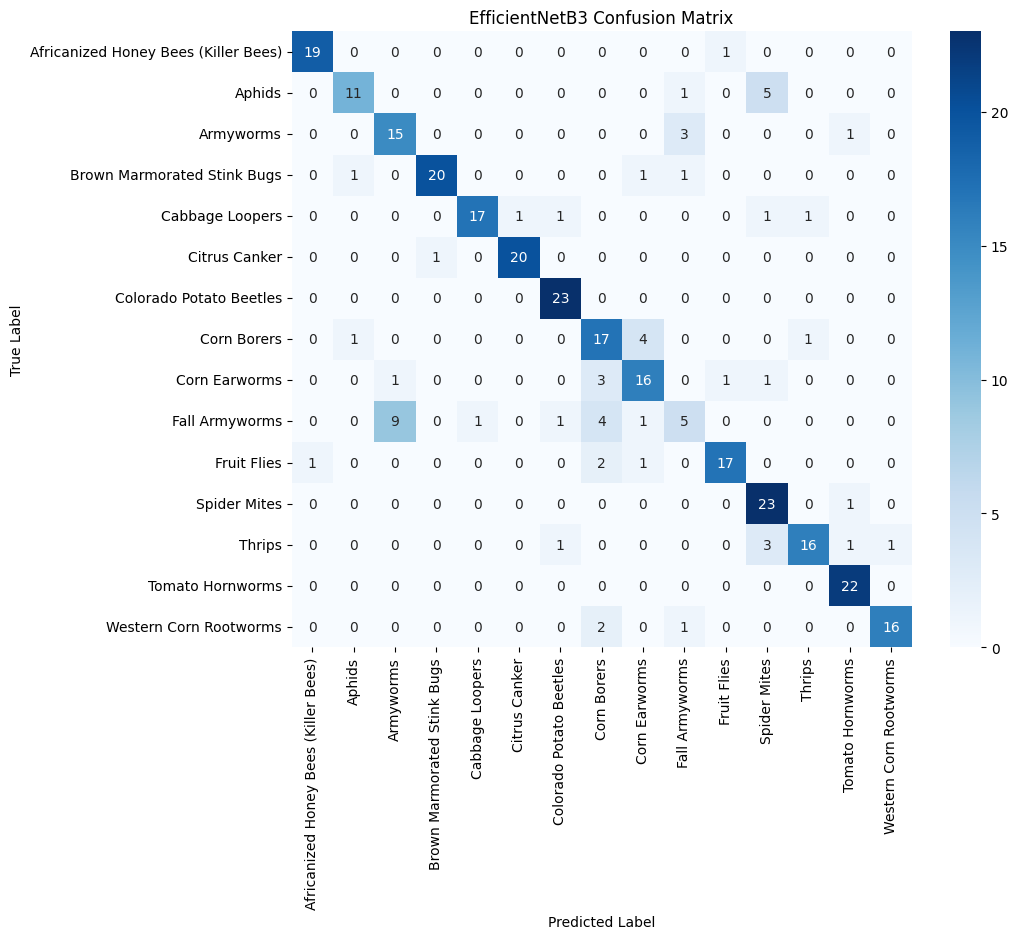

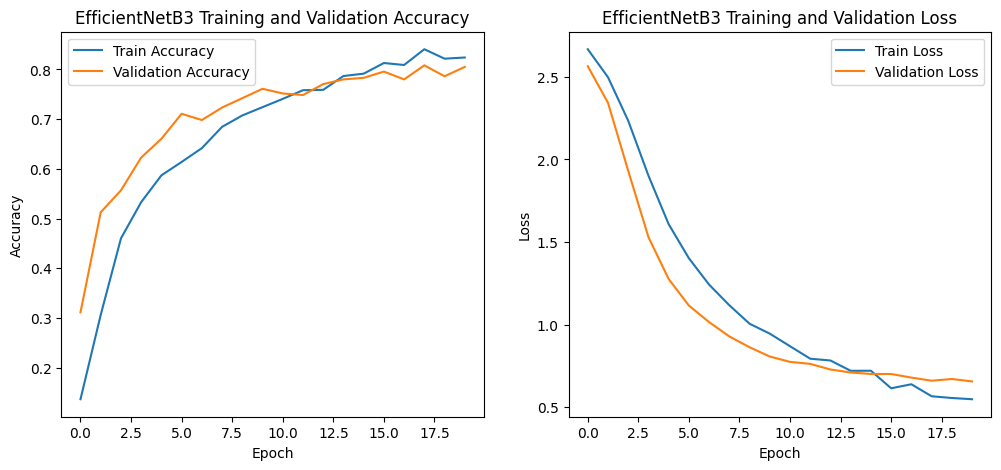

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from torchvision import models
from tqdm import tqdm
import os
from PIL import Image

# Set device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Image Preprocessing Script
def convert_to_rgb(image_dir):
    """
    Converts all images in a directory to RGB format.  Handles subdirectories.
    Correctly handles palette images with transparency.

    Args:
        image_dir (str): Path to the directory containing the images.
    """
    for root, _, files in os.walk(image_dir):  # Use os.walk to traverse subdirectories
        for filename in files:
            filepath = os.path.join(root, filename)
            try:
                img = Image.open(filepath)
                if img.mode == "P":
                    if "transparency" in img.info:
                        img = img.convert("RGBA")  # Convert palette images with transparency
                    else:
                        img = img.convert("RGB")
                elif img.mode in ("RGBA", "P"):
                    img = img.convert("RGB")
                img.save(filepath)  # Overwrite the original image
                # print(f"Converted {filename} to RGB") # Removed print statement
            except Exception as e:
                print(f"Error processing {filename}: {e}")

# Example usage:
train_dir = "/kaggle/working/train"  # Replace with your training data directory
val_dir = "/kaggle/working/val"    # Replace with your validation data directory

# Preprocess the images to convert them to RGB
print("Preprocessing training images...")
convert_to_rgb(train_dir)
print("Preprocessing validation images...")
convert_to_rgb(val_dir)
print("Image preprocessing complete.")


# Define data paths
data_dir = "/kaggle/working/"  # Update with your actual data directory.  **IMPORTANT: CHANGE THIS PATH**

# Data Augmentation and Normalization (Enhanced)
transform = {
    'train': transforms.Compose([
        transforms.ToTensor(),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

# Load Dataset using standard ImageFolder.  The images are already RGB after preprocessing.
train_dataset = datasets.ImageFolder(root=f"{data_dir}/train", transform=transform['train'])
val_dataset = datasets.ImageFolder(root=f"{data_dir}/val", transform=transform['val'])

# DataLoader
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4,
                                            pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4,
                                            pin_memory=True)

# Get class names
class_names = train_dataset.classes
num_classes = len(class_names)
print(f"Number of classes: {num_classes}")


# 2. EfficientNetB3 Model
def train_efficientnetb3(train_loader, val_loader, num_classes, num_epochs=20):
    """
    Trains an EfficientNetB3 model.

    Args:
        train_loader (DataLoader): DataLoader for the training set.
        val_loader (DataLoader): DataLoader for the validation set.
        num_classes (int): Number of classes in the dataset.
        num_epochs (int, optional): Number of epochs to train for. Defaults to 20.

    Returns:
        tuple: (train_acc_history, val_acc_history, train_loss_history, val_loss_history)
               Tuples of lists containing the training and validation accuracy and loss for each epoch.
    """
    model = models.efficientnet_b3(weights="DEFAULT").to(device)
    model.classifier[-1] = nn.Linear(model.classifier[-1].in_features, num_classes).to(
        device)  # Adjust the final classifier
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.00005)  # Lower learning rate for fine-tuning

    train_acc_history = []
    val_acc_history = []
    train_loss_history = []
    val_loss_history = []
    best_val_acc = 0.0

    for epoch in range(num_epochs):
        model.train()
        train_loss, correct_train, total_train = 0.0, 0, 0

        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs} [Training]", leave=False)
        for images, labels in progress_bar:
            images, labels = images.to(device, non_blocking=True), labels.to(device, non_blocking=True)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_train += torch.sum(preds == labels).item()
            total_train += labels.size(0)

            progress_bar.set_postfix(loss=loss.item(), acc=correct_train / total_train)

        train_accuracy = correct_train / total_train
        train_loss /= len(train_loader)
        train_acc_history.append(train_accuracy)
        train_loss_history.append(train_loss)

        model.eval()
        val_loss, correct_val, total_val = 0.0, 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device, non_blocking=True), labels.to(device, non_blocking=True)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                correct_val += torch.sum(preds == labels).item()
                total_val += labels.size(0)

        val_accuracy = correct_val / total_val
        val_loss /= len(val_loader)
        val_acc_history.append(val_accuracy)
        val_loss_history.append(val_loss)

        print(
            f"Epoch {epoch + 1}/{num_epochs}: Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            torch.save(model.state_dict(), "efficientnetb3_best_model.pth")
            print(f"Saved best EfficientNetB3 model with validation accuracy: {best_val_acc:.4f}")

    # Clear GPU memory after training
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

    return train_acc_history, val_acc_history, train_loss_history, val_loss_history



def evaluate_efficientnetb3(model, dataloader, class_names):
    """
    Evaluates the EfficientNetB3 model on the given dataloader and prints the classification report and confusion matrix.

    Args:
        model (nn.Module): The trained EfficientNetB3 model.
        dataloader (DataLoader): DataLoader for the dataset to evaluate on.
        class_names (list): List of class names.
    """
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in tqdm(dataloader, desc="Evaluating EfficientNetB3"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    print("EfficientNetB3 Classification Report:\n", classification_report(all_labels, all_preds, target_names=class_names))

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_names,
                yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("EfficientNetB3 Confusion Matrix")
    plt.show()

    # Clear GPU memory after evaluation
    if torch.cuda.is_available():
        torch.cuda.empty_cache()



# Train and Evaluate EfficientNetB3
print("Training EfficientNetB3...")
train_acc_efficientnet, val_acc_efficientnet, train_loss_efficientnet, val_loss_efficientnet = train_efficientnetb3(
    train_loader, val_loader, num_classes)

# Load the best EfficientNetB3 model
efficientnet_model = models.efficientnet_b3(weights="DEFAULT").to(device)
efficientnet_model.classifier[-1] = nn.Linear(efficientnet_model.classifier[-1].in_features, num_classes).to(device)
efficientnet_model.load_state_dict(torch.load("efficientnetb3_best_model.pth", weights_only=True))
efficientnet_model.eval()

print("Evaluating EfficientNetB3...")
evaluate_efficientnetb3(efficientnet_model, val_loader, class_names)

# Plotting EfficientNetB3 Accuracy and Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_acc_efficientnet, label="Train Accuracy")
plt.plot(val_acc_efficientnet, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("EfficientNetB3 Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(train_loss_efficientnet, label="Train Loss")
plt.plot(val_loss_efficientnet, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("EfficientNetB3 Training and Validation Loss")
plt.show()

Preprocessing training images...
Converted Image_62.gif to RGB
Converted Image_35.gif to RGB
Converted Image_64.gif to RGB
Converted Image_4.gif to RGB
Converted Image_23.gif to RGB
Converted Image_116.gif to RGB
Converted Image_68.gif to RGB
Preprocessing validation images...
Converted Image_27.gif to RGB
Converted Image_115.gif to RGB
Converted Image_49.gif to RGB
Converted Image_81.gif to RGB
Converted Image_40.gif to RGB
Image preprocessing complete.
Using device: cuda
Number of classes: 15


Epoch 1/20: Train Acc: 0.2458, Val Acc: 0.5440, Train Loss: 2.5978, Val Loss: 2.3208
Saved best model with validation accuracy: 0.5440


Epoch 2/20: Train Acc: 0.5163, Val Acc: 0.6352, Train Loss: 1.8857, Val Loss: 1.3312
Saved best model with validation accuracy: 0.6352


Epoch 3/20: Train Acc: 0.6423, Val Acc: 0.7107, Train Loss: 1.2512, Val Loss: 0.8753
Saved best model with validation accuracy: 0.7107


Epoch 4/20: Train Acc: 0.7066, Val Acc: 0.7390, Train Loss: 0.9572, Val Loss: 0.7651
Saved best model with validation accuracy: 0.7390


Epoch 5/20: Train Acc: 0.7431, Val Acc: 0.7673, Train Loss: 0.8404, Val Loss: 0.7086
Saved best model with validation accuracy: 0.7673


Epoch 6/20: Train Acc: 0.7692, Val Acc: 0.7642, Train Loss: 0.7221, Val Loss: 0.6821


Epoch 7/20: Train Acc: 0.7906, Val Acc: 0.7799, Train Loss: 0.6338, Val Loss: 0.6914
Saved best model with validation accuracy: 0.7799


Epoch 8/20: Train Acc: 0.8041, Val Acc: 0.7893, Train Loss: 0.6034, Val Loss: 0.6545
Saved best model with validation accuracy: 0.7893


Epoch 9/20: Train Acc: 0.8255, Val Acc: 0.7862, Train Loss: 0.5374, Val Loss: 0.6564


Epoch 10/20: Train Acc: 0.8715, Val Acc: 0.8113, Train Loss: 0.4460, Val Loss: 0.6231
Saved best model with validation accuracy: 0.8113


Epoch 11/20: Train Acc: 0.8676, Val Acc: 0.7799, Train Loss: 0.4269, Val Loss: 0.6604


Epoch 12/20: Train Acc: 0.8660, Val Acc: 0.7925, Train Loss: 0.4058, Val Loss: 0.6414


Epoch 13/20: Train Acc: 0.8795, Val Acc: 0.8019, Train Loss: 0.3897, Val Loss: 0.6638


Epoch 14/20: Train Acc: 0.8779, Val Acc: 0.7925, Train Loss: 0.3825, Val Loss: 0.6133


Epoch 15/20: Train Acc: 0.8898, Val Acc: 0.8050, Train Loss: 0.3556, Val Loss: 0.6391


Epoch 16/20: Train Acc: 0.9033, Val Acc: 0.7830, Train Loss: 0.3146, Val Loss: 0.6921


Epoch 17/20: Train Acc: 0.8890, Val Acc: 0.8019, Train Loss: 0.3267, Val Loss: 0.6810


Epoch 18/20: Train Acc: 0.8834, Val Acc: 0.8050, Train Loss: 0.3447, Val Loss: 0.6986


Epoch 19/20: Train Acc: 0.9048, Val Acc: 0.7830, Train Loss: 0.2993, Val Loss: 0.7553


Epoch 20/20: Train Acc: 0.8906, Val Acc: 0.7767, Train Loss: 0.3261, Val Loss: 0.7482


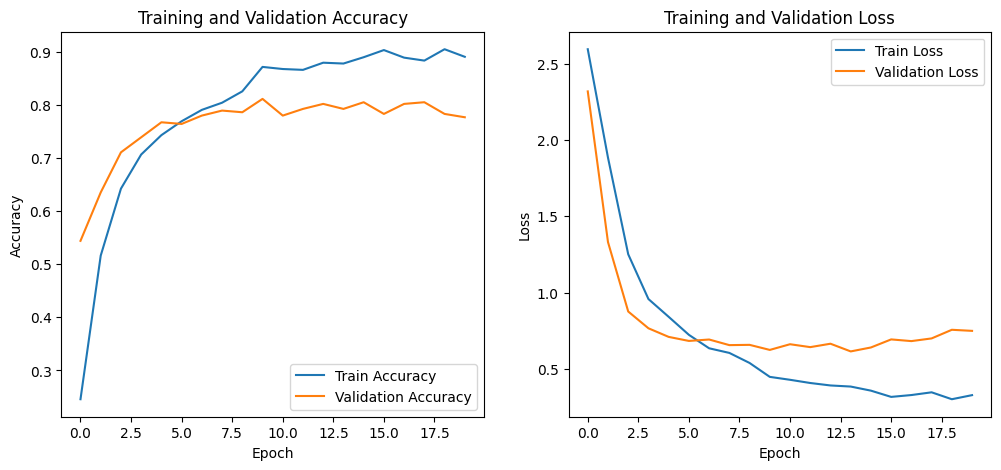

Evaluating: 100%|██████████| 20/20 [00:07<00:00,  2.79it/s]


Classification Report:
                                       precision    recall  f1-score   support

Africanized Honey Bees (Killer Bees)       0.91      1.00      0.95        20
                              Aphids       0.76      0.76      0.76        17
                           Armyworms       0.50      0.37      0.42        19
         Brown Marmorated Stink Bugs       0.86      0.83      0.84        23
                     Cabbage Loopers       0.86      0.90      0.88        21
                       Citrus Canker       0.95      0.95      0.95        21
             Colorado Potato Beetles       0.88      1.00      0.94        23
                         Corn Borers       0.90      0.78      0.84        23
                       Corn Earworms       0.81      0.77      0.79        22
                      Fall Armyworms       0.50      0.62      0.55        21
                         Fruit Flies       0.86      0.86      0.86        21
                        Spider Mites   

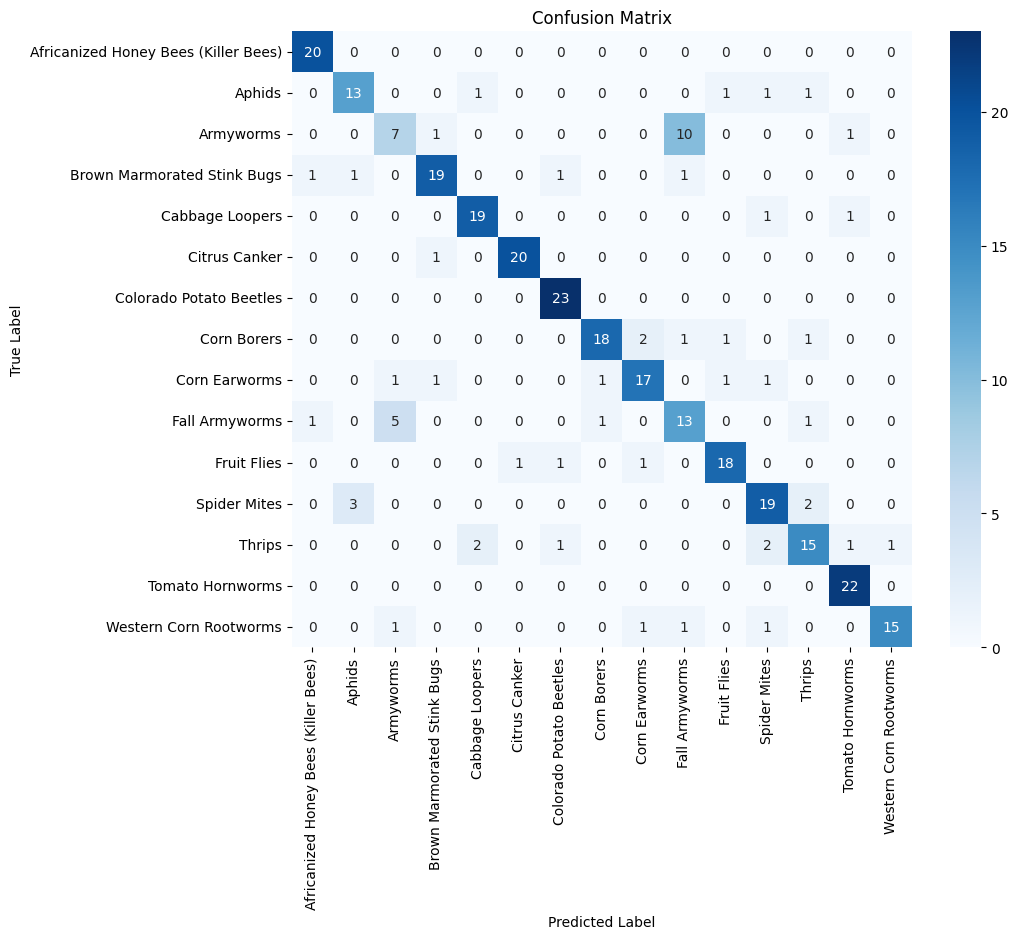

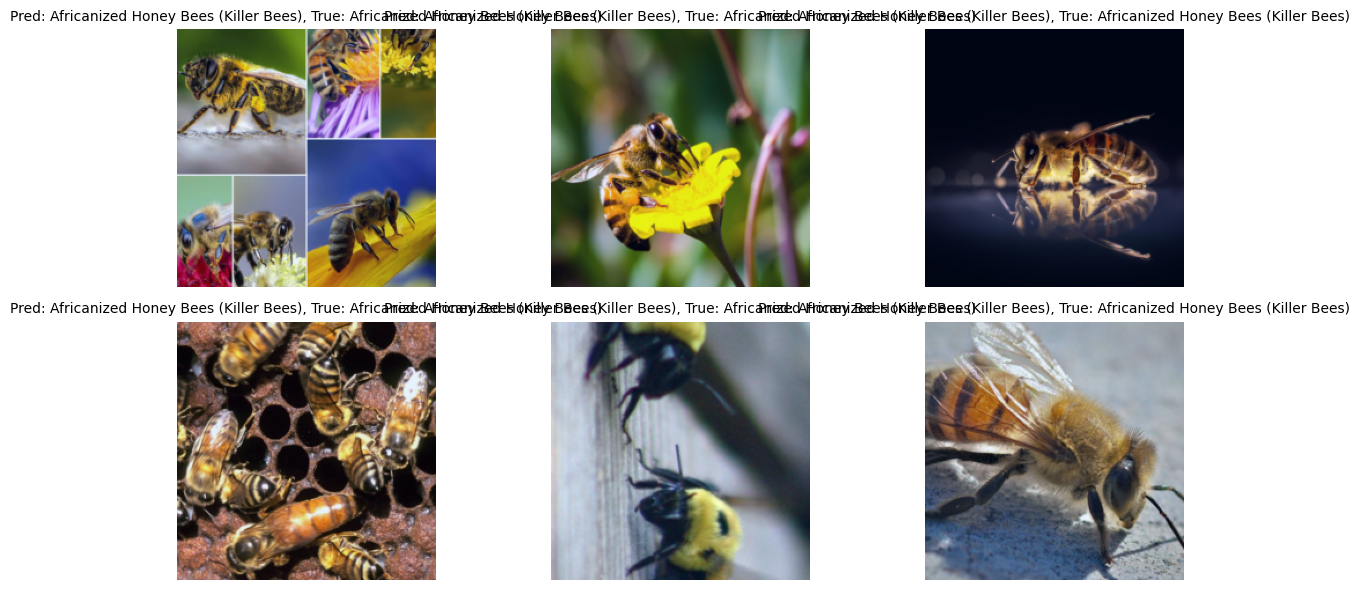

In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from torchvision import models
from tqdm import tqdm
from PIL import Image
import os

# Image Preprocessing Script
def convert_to_rgb(image_dir):
    """
    Converts all images in a directory to RGB format.  Handles subdirectories.

    Args:
        image_dir (str): Path to the directory containing the images.
    """
    for root, _, files in os.walk(image_dir):  # Use os.walk to traverse subdirectories
        for filename in files:
            filepath = os.path.join(root, filename)
            try:
                img = Image.open(filepath)
                if img.mode in ("RGBA", "P"):
                    img = img.convert("RGB")
                    img.save(filepath)  # Overwrite the original image
                    print(f"Converted {filename} to RGB")
            except Exception as e:
                print(f"Error processing {filename}: {e}")

# Example usage:
train_dir = "/kaggle/working/train"  # Replace with your training data directory
val_dir = "/kaggle/working/val"      # Replace with your validation data directory

# Preprocess the images to convert them to RGB
print("Preprocessing training images...")
convert_to_rgb(train_dir)
print("Preprocessing validation images...")
convert_to_rgb(val_dir)
print("Image preprocessing complete.")

# Set device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define data paths
data_dir = "/kaggle/working/"  # Update with your actual data directory.  **IMPORTANT: CHANGE THIS PATH**

# Data Augmentation and Normalization (Enhanced)
transform = {
    'train': transforms.Compose([
        transforms.ToTensor(),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

# Load Dataset using standard ImageFolder.  The images are already RGB after preprocessing.
train_dataset = datasets.ImageFolder(root=f"{data_dir}/train", transform=transform['train'])
val_dataset = datasets.ImageFolder(root=f"{data_dir}/val", transform=transform['val'])

# DataLoader
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4,
                            pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4,
                          pin_memory=True)

# Get class names
class_names = train_dataset.classes
num_classes = len(class_names)
print(f"Number of classes: {num_classes}")



# Hybrid Model: ResNet50 + EfficientNetB3 (Enhanced)
class HybridModel(nn.Module):
    def __init__(self, num_classes):
        super(HybridModel, self).__init__()
        self.resnet = models.resnet50(weights="DEFAULT")
        self.efficientnet = models.efficientnet_b3(weights="DEFAULT")

        # Remove last classification layer
        self.resnet.fc = nn.Identity()
        self.efficientnet.classifier[-1] = nn.Identity()

        # Define a fully connected layer for combined output
        self.fc = nn.Sequential(
            nn.Linear(2048 + 1536, 1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, num_classes)
        )

    def forward(self, x):
        x1 = self.resnet(x)
        x2 = self.efficientnet(x)
        x_combined = torch.cat((x1, x2), dim=1)
        out = self.fc(x_combined)
        return out



# Initialize model
model = HybridModel(num_classes).to(device)

# Define Loss and Optimizer (Adjusted Learning Rate)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00005)

# Training Function (Fine-tuning)
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    train_acc_history = []
    val_acc_history = []
    train_loss_history = []
    val_loss_history = []

    best_val_acc = 0.0
    for epoch in range(num_epochs):
        model.train()
        train_loss, correct_train, total_train = 0.0, 0, 0

        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs} [Training]", leave=False)
        for images, labels in progress_bar:
            images, labels = images.to(device, non_blocking=True), labels.to(device, non_blocking=True)
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_train += torch.sum(preds == labels).item()
            total_train += labels.size(0)

            progress_bar.set_postfix(loss=loss.item(), acc=correct_train / total_train)

        train_accuracy = correct_train / total_train
        train_loss /= len(train_loader)
        train_acc_history.append(train_accuracy)
        train_loss_history.append(train_loss)

        model.eval()
        val_loss, correct_val, total_val = 0.0, 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device, non_blocking=True), labels.to(device, non_blocking=True)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                correct_val += torch.sum(preds == labels).item()
                total_val += labels.size(0)

        val_accuracy = correct_val / total_val
        val_loss /= len(val_loader)
        val_acc_history.append(val_accuracy)
        val_loss_history.append(val_loss)

        print(
            f"Epoch {epoch + 1}/{num_epochs}: Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            torch.save(model.state_dict(), "best_model.pth")
            print(f"Saved best model with validation accuracy: {best_val_acc:.4f}")

    # Clear GPU memory after training
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
    return train_acc_history, val_acc_history, train_loss_history, val_loss_history



# Train the model
train_acc, val_acc, train_loss, val_loss = train_model(model, train_loader, val_loader, criterion, optimizer,
                                                        num_epochs=20)

# Load the best model
model.load_state_dict(torch.load("best_model.pth", weights_only=True))
model.eval()


# Plot Accuracy and Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label="Train Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()



# Confusion Matrix and Classification Report
def evaluate_model(model, dataloader, class_names):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in tqdm(dataloader, desc="Evaluating"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    print("Classification Report:\n", classification_report(all_labels, all_preds, target_names=class_names))

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_names,
                yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    # Clear GPU memory after evaluation
    if torch.cuda.is_available():
        torch.cuda.empty_cache()


# Evaluate the model on the validation set
evaluate_model(model, val_loader, class_names)



# Display Sample Predictions
def show_predictions(model, dataloader, class_names, num_images=6):
    model.eval()
    images_shown = 0

    plt.figure(figsize=(12, 6))
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        for i in range(images.shape[0]):
            if images_shown >= num_images:
                break
            img = images[i].cpu().permute(1, 2, 0).numpy()
            img = (img - img.min()) / (img.max() - img.min())

            # Create a new subplot for each image
            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(img)
            plt.title(f"Pred: {class_names[preds[i]]}, \nTrue: {class_names[labels[i]]}", fontsize=10) # Added fontsize
            plt.axis("off")
            images_shown += 1
    plt.tight_layout() # Added to adjust spacing
    plt.show()



# Show predictions on the validation set
show_predictions(model, val_loader, class_names)

# Hybrid Model - 2: EfficientNet-B0 + DenseNet121

Epoch 1/20 => Train Acc: 0.2601, Val Acc: 0.5000, Train Loss: 2.5559, Val Loss: 2.2409


Epoch 2/20 => Train Acc: 0.5591, Val Acc: 0.6289, Train Loss: 1.8167, Val Loss: 1.3693


Epoch 3/20 => Train Acc: 0.7082, Val Acc: 0.7170, Train Loss: 1.1111, Val Loss: 0.9471


Epoch 4/20 => Train Acc: 0.7748, Val Acc: 0.7170, Train Loss: 0.7280, Val Loss: 0.8593


Epoch 5/20 => Train Acc: 0.8335, Val Acc: 0.7170, Train Loss: 0.5097, Val Loss: 0.8243


Epoch 6/20 => Train Acc: 0.8866, Val Acc: 0.7138, Train Loss: 0.3645, Val Loss: 0.8158


Epoch 7/20 => Train Acc: 0.9191, Val Acc: 0.7044, Train Loss: 0.2798, Val Loss: 0.8249


Epoch 8/20 => Train Acc: 0.9461, Val Acc: 0.7138, Train Loss: 0.1942, Val Loss: 0.8414


Epoch 9/20 => Train Acc: 0.9524, Val Acc: 0.7264, Train Loss: 0.1535, Val Loss: 0.8725


Epoch 10/20 => Train Acc: 0.9524, Val Acc: 0.7138, Train Loss: 0.1452, Val Loss: 0.8840


Epoch 11/20 => Train Acc: 0.9635, Val Acc: 0.7421, Train Loss: 0.1183, Val Loss: 0.9101


Epoch 12/20 => Train Acc: 0.9651, Val Acc: 0.7107, Train Loss: 0.1074, Val Loss: 0.9615


Epoch 13/20 => Train Acc: 0.9675, Val Acc: 0.7233, Train Loss: 0.0932, Val Loss: 0.9716


Epoch 14/20 => Train Acc: 0.9722, Val Acc: 0.7327, Train Loss: 0.0937, Val Loss: 0.9660


Epoch 15/20 => Train Acc: 0.9683, Val Acc: 0.7421, Train Loss: 0.0845, Val Loss: 1.0333


Epoch 16/20 => Train Acc: 0.9715, Val Acc: 0.7296, Train Loss: 0.0841, Val Loss: 1.0255


Epoch 17/20 => Train Acc: 0.9770, Val Acc: 0.7390, Train Loss: 0.0645, Val Loss: 1.0641


Epoch 18/20 => Train Acc: 0.9770, Val Acc: 0.7358, Train Loss: 0.0653, Val Loss: 1.0689


Epoch 19/20 => Train Acc: 0.9699, Val Acc: 0.7296, Train Loss: 0.0677, Val Loss: 1.0577


Epoch 20/20 => Train Acc: 0.9826, Val Acc: 0.7201, Train Loss: 0.0564, Val Loss: 1.0809


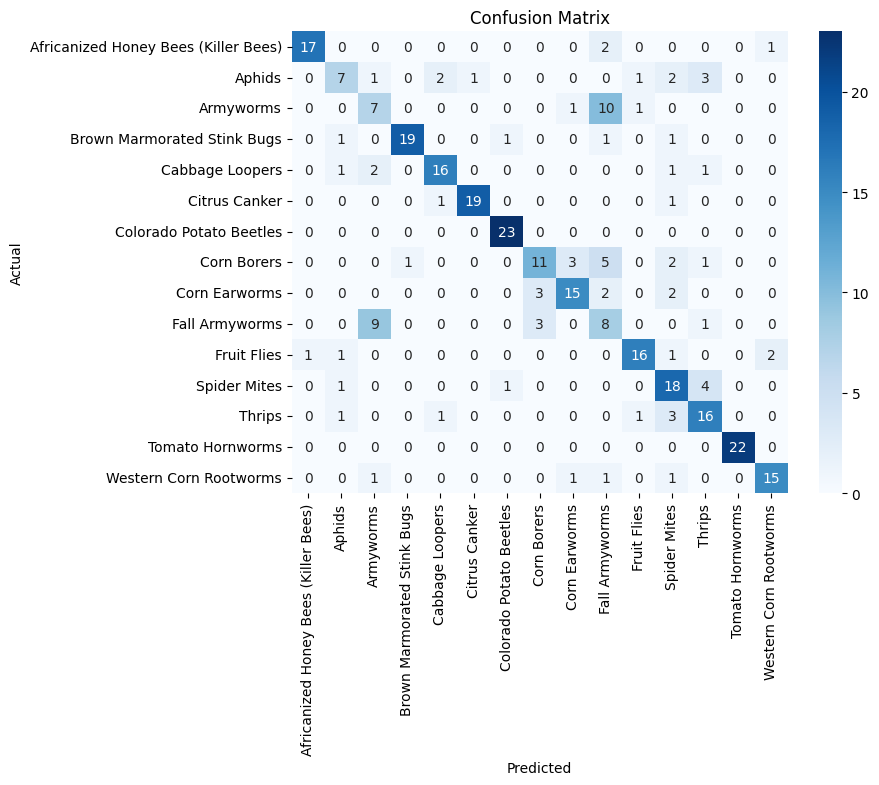


Classification Report:
                                      precision    recall  f1-score   support

Africanized Honey Bees (Killer Bees)       0.94      0.85      0.89        20
                              Aphids       0.58      0.41      0.48        17
                           Armyworms       0.35      0.37      0.36        19
         Brown Marmorated Stink Bugs       0.95      0.83      0.88        23
                     Cabbage Loopers       0.80      0.76      0.78        21
                       Citrus Canker       0.95      0.90      0.93        21
             Colorado Potato Beetles       0.92      1.00      0.96        23
                         Corn Borers       0.65      0.48      0.55        23
                       Corn Earworms       0.75      0.68      0.71        22
                      Fall Armyworms       0.28      0.38      0.32        21
                         Fruit Flies       0.84      0.76      0.80        21
                        Spider Mites   

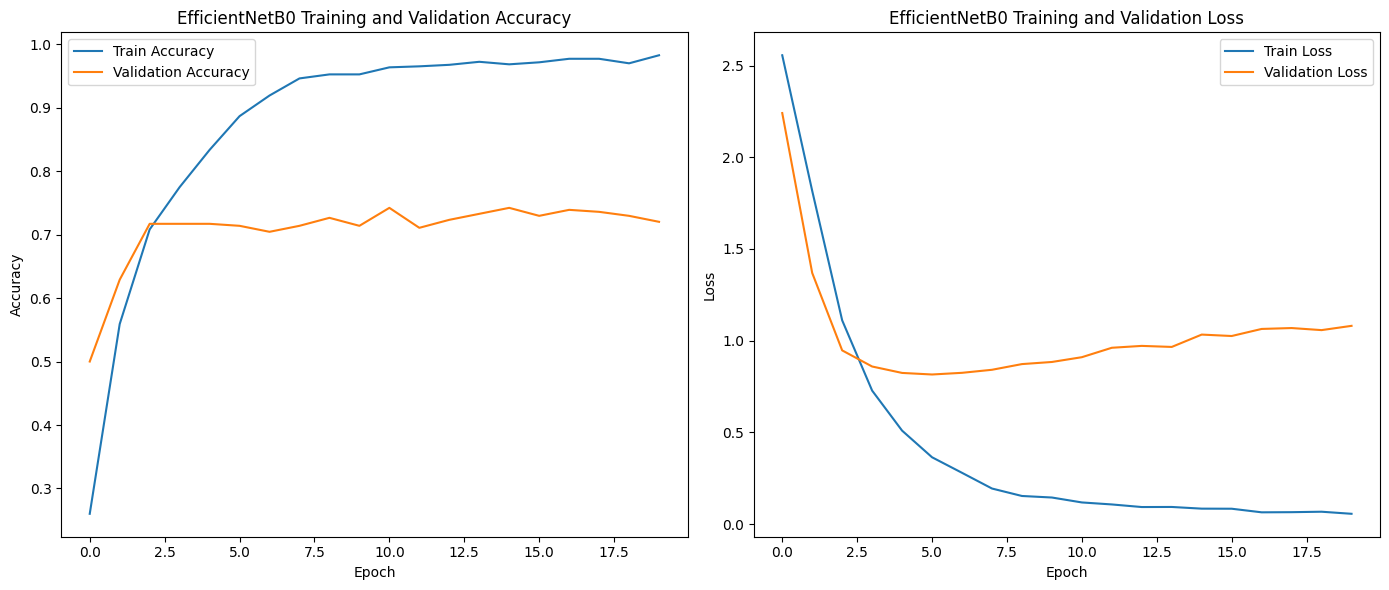

In [5]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tqdm import tqdm
import numpy as np

# Fix for image format warning
def pil_loader_rgb(path):
    with open(path, 'rb') as f:
        img = Image.open(f)
        return img.convert('RGB')

# Data Loading
def load_data(data_dir, batch_size):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])
    train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=transform, loader=pil_loader_rgb)
    val_dataset = datasets.ImageFolder(os.path.join(data_dir, 'val'), transform=transform, loader=pil_loader_rgb)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader, train_dataset.classes

# Model Definition
class EfficientNetModel(nn.Module):
    def __init__(self, num_classes):
        super(EfficientNetModel, self).__init__()
        self.efficientnet = models.efficientnet_b0(weights="DEFAULT")
        self.efficientnet.classifier = nn.Sequential(
            nn.Linear(1280, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        return self.efficientnet(x)

# Training Function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20, device="cuda"):
    train_acc_history, val_acc_history = [], []
    train_loss_history, val_loss_history = [], []
    all_preds, all_labels = [], []

    for epoch in range(num_epochs):
        model.train()
        correct, total, running_loss = 0, 0, 0
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            running_loss += loss.item()

        train_acc = correct / total
        train_loss = running_loss / len(train_loader)
        train_acc_history.append(train_acc)
        train_loss_history.append(train_loss)

        model.eval()
        correct, total, running_loss = 0, 0, 0
        val_epoch_preds, val_epoch_labels = [], []

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                running_loss += loss.item()

                val_epoch_preds.extend(predicted.cpu().numpy())
                val_epoch_labels.extend(labels.cpu().numpy())

        val_acc = correct / total
        val_loss = running_loss / len(val_loader)
        val_acc_history.append(val_acc)
        val_loss_history.append(val_loss)

        print(f"Epoch {epoch+1}/{num_epochs} => Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    all_preds = val_epoch_preds
    all_labels = val_epoch_labels

    return all_labels, all_preds, train_acc_history, val_acc_history, train_loss_history, val_loss_history

# Evaluation & Plotting
def evaluate(all_labels, all_preds, class_names):
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))

def plot_accuracy_loss(train_acc, val_acc, train_loss, val_loss):
    epochs = range(len(train_acc))

    plt.figure(figsize=(14, 6))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_acc, label='Train Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('EfficientNetB0 Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_loss, label='Train Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('EfficientNetB0 Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Main
def main():
    data_dir = "/kaggle/working/"  # Update to your path
    batch_size = 16
    num_epochs = 20
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    train_loader, val_loader, class_names = load_data(data_dir, batch_size)
    model = EfficientNetModel(len(class_names)).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)

    all_labels, all_preds, train_acc, val_acc, train_loss, val_loss = train_model(
        model, train_loader, val_loader, criterion, optimizer, num_epochs, device)

    evaluate(all_labels, all_preds, class_names)
    plot_accuracy_loss(train_acc, val_acc, train_loss, val_loss)

if __name__ == "__main__":
    main()

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 136MB/s] 
Epoch 1/20:  33%|███▎      | 26/79 [00:08<00:15,  3.49it/s]/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


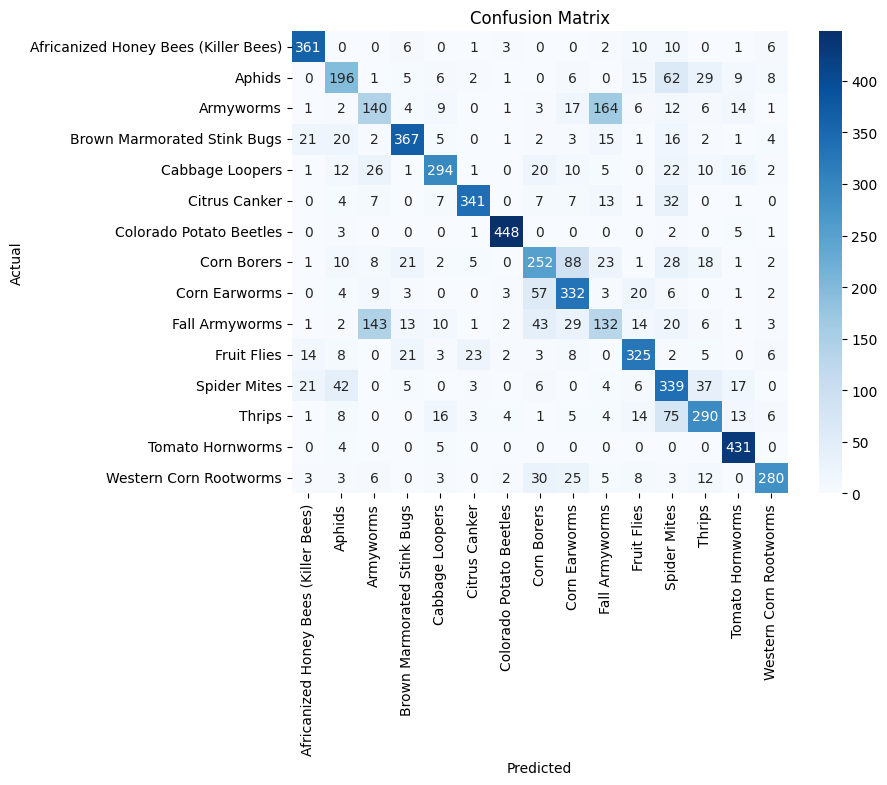

Classification Report:
                                      precision    recall  f1-score   support

Africanized Honey Bees (Killer Bees)       0.85      0.90      0.88       400
                              Aphids       0.62      0.58      0.60       340
                           Armyworms       0.41      0.37      0.39       380
         Brown Marmorated Stink Bugs       0.82      0.80      0.81       460
                     Cabbage Loopers       0.82      0.70      0.75       420
                       Citrus Canker       0.90      0.81      0.85       420
             Colorado Potato Beetles       0.96      0.97      0.97       460
                         Corn Borers       0.59      0.55      0.57       460
                       Corn Earworms       0.63      0.75      0.68       440
                      Fall Armyworms       0.36      0.31      0.33       420
                         Fruit Flies       0.77      0.77      0.77       420
                        Spider Mites    

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from torchvision import models
from tqdm import tqdm
import os

# Data Preprocessing
def load_data(data_dir, batch_size):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    train_dataset = datasets.ImageFolder(root=os.path.join(data_dir, "train"), transform=transform)
    val_dataset = datasets.ImageFolder(root=os.path.join(data_dir, "val"), transform=transform)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    
    return train_loader, val_loader, train_dataset.classes

# DenseNet121 Model
class DenseNetModel(nn.Module):
    def __init__(self, num_classes):
        super(DenseNetModel, self).__init__()
        self.densenet = models.densenet121(weights="DEFAULT")
        self.densenet.classifier = nn.Sequential(
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        return self.densenet(x)

# Training Function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20, device="cuda"):
    all_preds, all_labels = [], []

    for epoch in range(num_epochs):
        model.train()
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        model.eval()
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

    return all_labels, all_preds

# Evaluation
def evaluate(all_labels, all_preds, class_names):
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))

# Main Execution
def main():
    data_dir = "/kaggle/working/"  # Update this path
    batch_size = 16
    num_epochs = 20
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    train_loader, val_loader, class_names = load_data(data_dir, batch_size)
    model = DenseNetModel(len(class_names)).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)

    all_labels, all_preds = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device)
    evaluate(all_labels, all_preds, class_names)

if __name__ == "__main__":
    main()

Using device: cuda
Preprocessing images...
Converted Image_68.gif to RGB
Converted Image_116.gif to RGB
Converted Image_4.gif to RGB
Converted Image_62.gif to RGB
Converted Image_23.gif to RGB
Converted Image_64.gif to RGB
Converted Image_35.gif to RGB
Converted Image_115.gif to RGB
Converted Image_40.gif to RGB
Converted Image_81.gif to RGB
Converted Image_49.gif to RGB
Converted Image_27.gif to RGB
Image preprocessing complete.


Epoch 1: Train Acc: 0.2641, Val Acc: 0.5126, Train Loss: 2.4291, Val Loss: 1.7082


Epoch 2: Train Acc: 0.5123, Val Acc: 0.6698, Train Loss: 1.6307, Val Loss: 1.0789


Epoch 3: Train Acc: 0.6027, Val Acc: 0.7075, Train Loss: 1.2810, Val Loss: 0.9251


Epoch 4: Train Acc: 0.6598, Val Acc: 0.7075, Train Loss: 1.0780, Val Loss: 0.8763


Epoch 5: Train Acc: 0.6994, Val Acc: 0.7421, Train Loss: 0.9533, Val Loss: 0.8196


Epoch 6: Train Acc: 0.7256, Val Acc: 0.7264, Train Loss: 0.8557, Val Loss: 0.8358


Epoch 7: Train Acc: 0.7407, Val Acc: 0.7484, Train Loss: 0.8120, Val Loss: 0.7506


Epoch 8: Train Acc: 0.7748, Val Acc: 0.7390, Train Loss: 0.7048, Val Loss: 0.8164


Epoch 9: Train Acc: 0.7803, Val Acc: 0.7327, Train Loss: 0.6715, Val Loss: 0.7855


Epoch 10: Train Acc: 0.7772, Val Acc: 0.7610, Train Loss: 0.6650, Val Loss: 0.7835


Epoch 11: Train Acc: 0.7930, Val Acc: 0.7579, Train Loss: 0.6254, Val Loss: 0.7510


Epoch 12: Train Acc: 0.8184, Val Acc: 0.7642, Train Loss: 0.5821, Val Loss: 0.7918


Epoch 13: Train Acc: 0.8382, Val Acc: 0.7736, Train Loss: 0.5136, Val Loss: 0.7803


Epoch 14: Train Acc: 0.8430, Val Acc: 0.7642, Train Loss: 0.5155, Val Loss: 0.7542


Epoch 15: Train Acc: 0.8549, Val Acc: 0.7673, Train Loss: 0.4449, Val Loss: 0.8088


Epoch 16: Train Acc: 0.8398, Val Acc: 0.7767, Train Loss: 0.4861, Val Loss: 0.8050


Epoch 17: Train Acc: 0.8652, Val Acc: 0.7767, Train Loss: 0.4390, Val Loss: 0.8410


Epoch 18: Train Acc: 0.8588, Val Acc: 0.7893, Train Loss: 0.4106, Val Loss: 0.7969


Epoch 19: Train Acc: 0.8707, Val Acc: 0.7830, Train Loss: 0.4022, Val Loss: 0.8155


Epoch 20: Train Acc: 0.8644, Val Acc: 0.7547, Train Loss: 0.3876, Val Loss: 0.8461


Epoch 21: Train Acc: 0.8858, Val Acc: 0.7956, Train Loss: 0.3514, Val Loss: 0.7968


Epoch 22: Train Acc: 0.8985, Val Acc: 0.7704, Train Loss: 0.3116, Val Loss: 0.8520


Epoch 23: Train Acc: 0.8890, Val Acc: 0.7767, Train Loss: 0.3262, Val Loss: 0.8465


Epoch 24: Train Acc: 0.8961, Val Acc: 0.7956, Train Loss: 0.3132, Val Loss: 0.7861


Epoch 25: Train Acc: 0.8842, Val Acc: 0.8050, Train Loss: 0.3438, Val Loss: 0.8520


Epoch 26: Train Acc: 0.9017, Val Acc: 0.7862, Train Loss: 0.3221, Val Loss: 0.8367


Epoch 27: Train Acc: 0.8921, Val Acc: 0.8050, Train Loss: 0.3193, Val Loss: 0.8277


Epoch 28: Train Acc: 0.8993, Val Acc: 0.7862, Train Loss: 0.3083, Val Loss: 0.9124


Epoch 29: Train Acc: 0.9017, Val Acc: 0.7987, Train Loss: 0.3010, Val Loss: 0.8833


Epoch 30: Train Acc: 0.9120, Val Acc: 0.7925, Train Loss: 0.2538, Val Loss: 0.8381


Epoch 31: Train Acc: 0.8969, Val Acc: 0.7925, Train Loss: 0.2968, Val Loss: 0.8519


Epoch 32: Train Acc: 0.9128, Val Acc: 0.8050, Train Loss: 0.2625, Val Loss: 0.8332


Epoch 33: Train Acc: 0.9159, Val Acc: 0.7893, Train Loss: 0.2605, Val Loss: 0.8384


Epoch 34: Train Acc: 0.9120, Val Acc: 0.8019, Train Loss: 0.2533, Val Loss: 0.8341


Epoch 35: Train Acc: 0.9247, Val Acc: 0.7956, Train Loss: 0.2358, Val Loss: 0.8682


Epoch 36: Train Acc: 0.9151, Val Acc: 0.7987, Train Loss: 0.2494, Val Loss: 0.8621


Epoch 37: Train Acc: 0.9159, Val Acc: 0.8019, Train Loss: 0.2554, Val Loss: 0.8498


Epoch 38: Train Acc: 0.9199, Val Acc: 0.8082, Train Loss: 0.2415, Val Loss: 0.8467


Epoch 39: Train Acc: 0.9144, Val Acc: 0.8082, Train Loss: 0.2554, Val Loss: 0.8671


Epoch 40: Train Acc: 0.9262, Val Acc: 0.7987, Train Loss: 0.2465, Val Loss: 0.9001


Epoch 41: Train Acc: 0.9159, Val Acc: 0.8113, Train Loss: 0.2521, Val Loss: 0.8623


Epoch 42: Train Acc: 0.9183, Val Acc: 0.8050, Train Loss: 0.2495, Val Loss: 0.8730


Epoch 43: Train Acc: 0.9223, Val Acc: 0.7987, Train Loss: 0.2264, Val Loss: 0.8820


Epoch 44: Train Acc: 0.9167, Val Acc: 0.8145, Train Loss: 0.2371, Val Loss: 0.8434


Epoch 45: Train Acc: 0.9247, Val Acc: 0.7987, Train Loss: 0.2056, Val Loss: 0.8764


Epoch 46: Train Acc: 0.9167, Val Acc: 0.8019, Train Loss: 0.2360, Val Loss: 0.8709


Epoch 47: Train Acc: 0.9239, Val Acc: 0.8019, Train Loss: 0.2223, Val Loss: 0.8469


Epoch 48: Train Acc: 0.9159, Val Acc: 0.7987, Train Loss: 0.2330, Val Loss: 0.8579


Epoch 49: Train Acc: 0.9262, Val Acc: 0.8082, Train Loss: 0.2272, Val Loss: 0.8497


Epoch 50: Train Acc: 0.9334, Val Acc: 0.8113, Train Loss: 0.2219, Val Loss: 0.8716


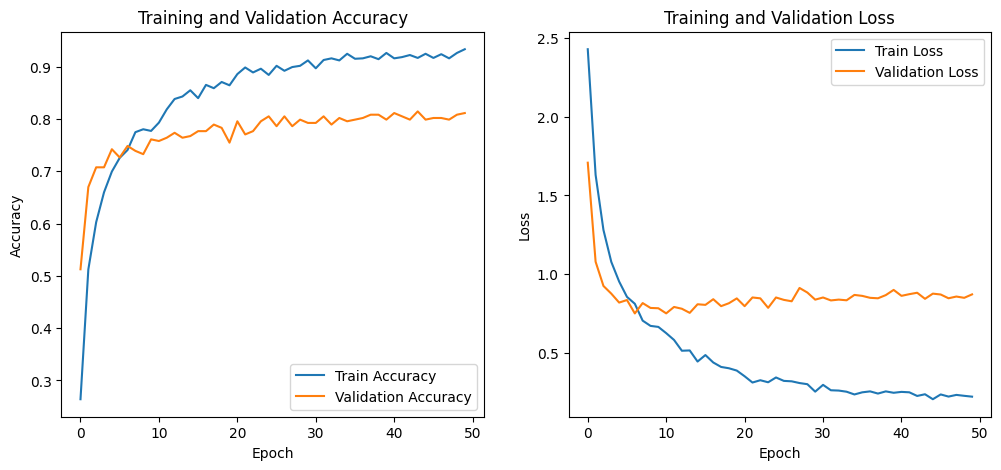

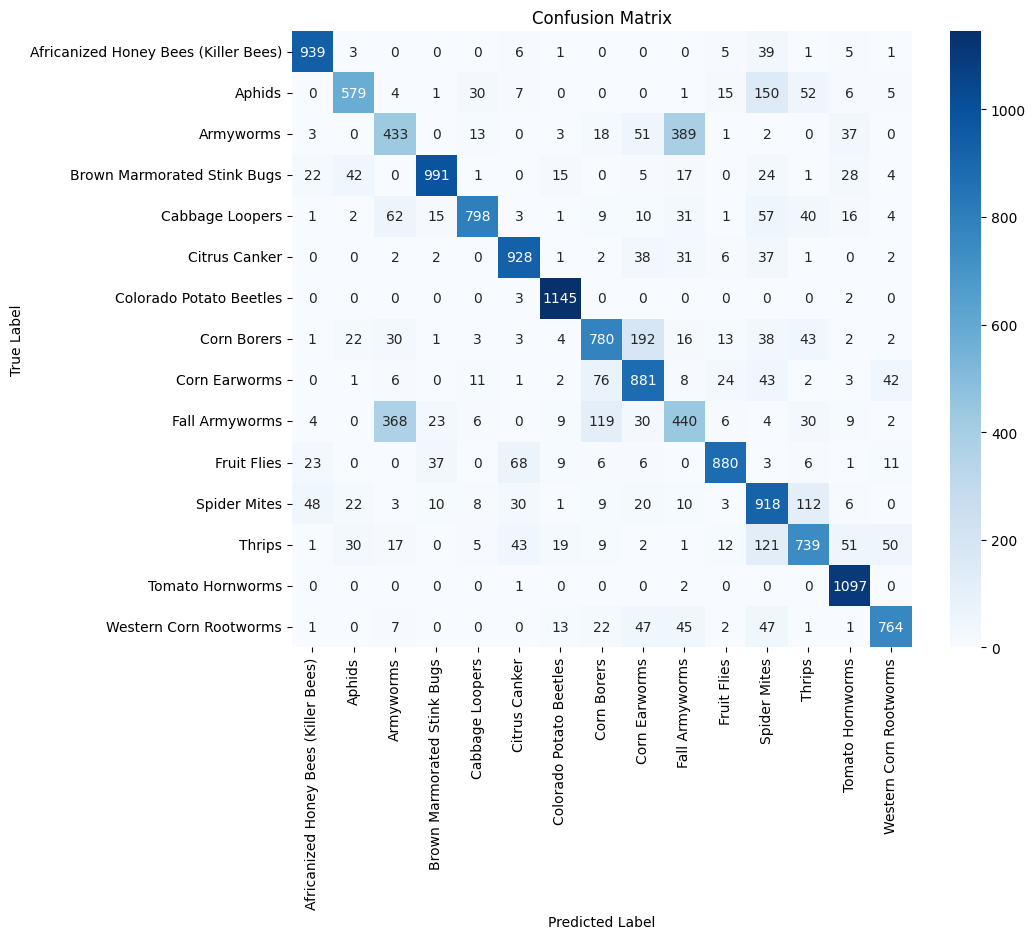

Classification Report:
                                      precision    recall  f1-score   support

Africanized Honey Bees (Killer Bees)       0.90      0.94      0.92      1000
                              Aphids       0.83      0.68      0.75       850
                           Armyworms       0.46      0.46      0.46       950
         Brown Marmorated Stink Bugs       0.92      0.86      0.89      1150
                     Cabbage Loopers       0.91      0.76      0.83      1050
                       Citrus Canker       0.85      0.88      0.87      1050
             Colorado Potato Beetles       0.94      1.00      0.97      1150
                         Corn Borers       0.74      0.68      0.71      1150
                       Corn Earworms       0.69      0.80      0.74      1100
                      Fall Armyworms       0.44      0.42      0.43      1050
                         Fruit Flies       0.91      0.84      0.87      1050
                        Spider Mites    

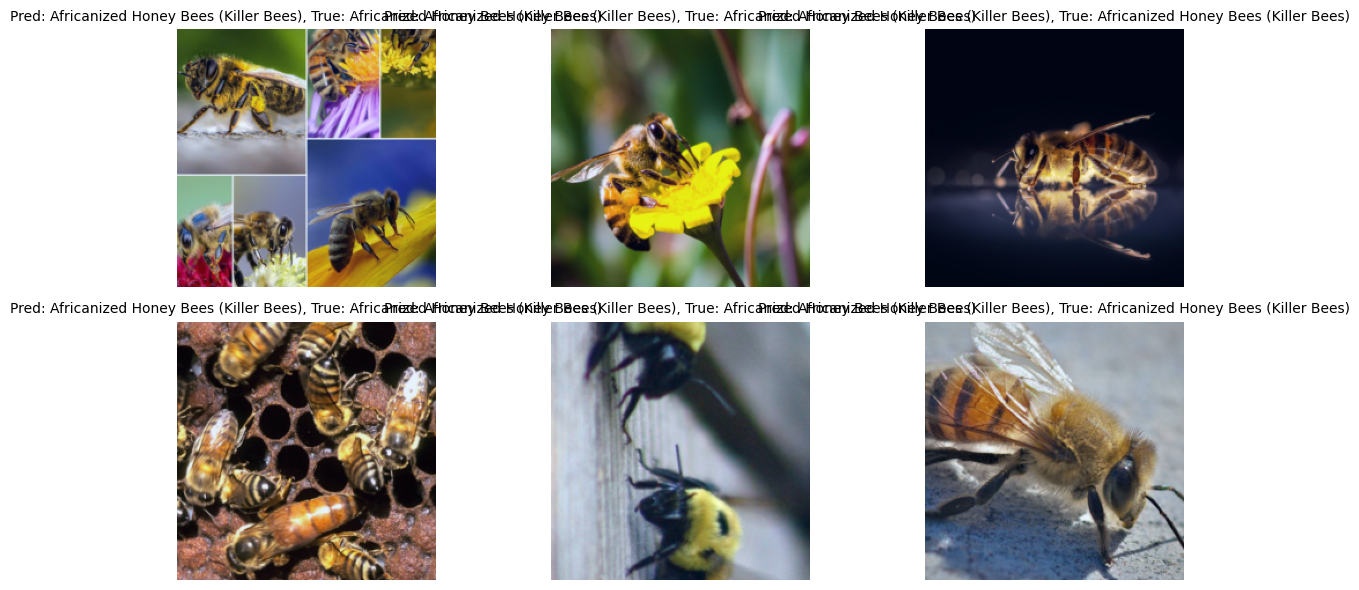

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from torchvision import models
from tqdm import tqdm
from PIL import Image
import os
import warnings
import gc

# 1. Image Preprocessing Script
def convert_to_rgb(image_dir):
    """
    Converts all images in a directory to RGB format. Handles subdirectories.

    Args:
        image_dir (str): Path to the directory containing the images.
    """
    for root, _, files in os.walk(image_dir):
        for filename in files:
            filepath = os.path.join(root, filename)
            try:
                img = Image.open(filepath)
                if img.mode in ("RGBA", "P"):
                    img = img.convert("RGB")
                    img.save(filepath)  # Overwrite the original image
                    print(f"Converted {filename} to RGB")
            except Exception as e:
                print(f"Error processing {filename}: {e}")

# 2. Data Loading and Augmentation
def load_data(data_dir, batch_size):
    """
    Loads and preprocesses the training and validation datasets.

    Args:
        data_dir (str): Path to the directory containing the data.
        batch_size (int): The batch size for the DataLoaders.

    Returns:
        tuple: (train_loader, val_loader, class_names)
    """
    train_transform = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(p=0.5),  # Increased probability
        transforms.RandomRotation(30),  # Increased rotation
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.3, hue=0.2),  # Stronger jitter
        transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1)), #random affine
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    val_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    train_dataset = datasets.ImageFolder(root=os.path.join(data_dir, "train"), transform=train_transform)
    val_dataset = datasets.ImageFolder(root=os.path.join(data_dir, "val"), transform=val_transform)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True) # Reduced num_workers
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True) # Reduced num_workers

    class_names = train_dataset.classes
    return train_loader, val_loader, class_names

# 3. Hybrid Model Definition
class HybridModel2(nn.Module):
    def __init__(self, num_classes):
        super(HybridModel2, self).__init__()
        self.efficientnet = models.efficientnet_b0(weights="DEFAULT")
        self.densenet = models.densenet121(weights="DEFAULT")

        # Remove last classification layer
        self.efficientnet.classifier = nn.Identity()
        self.densenet.classifier = nn.Identity()

        # Get feature sizes
        efficientnet_out = 1280  # EfficientNet-B0 feature size
        densenet_out = 1024  # DenseNet121 feature size

        # Fully connected layer for combined output
        self.fc = nn.Sequential(
            nn.Linear(efficientnet_out + densenet_out, 1024),
            nn.ReLU(),
            nn.Dropout(0.5),  # Add dropout for regularization
            nn.Linear(1024, num_classes)
        )

    def forward(self, x):
        x1 = self.efficientnet(x)
        x2 = self.densenet(x)
        x_combined = torch.cat((x1, x2), dim=1)
        out = self.fc(x_combined)
        return out

# 4. Training Function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20, device="cuda"):
    """
    Trains the model on the training set and validates on the validation set.

    Args:
        model (nn.Module): The model to train.
        train_loader (DataLoader): DataLoader for the training set.
        val_loader (DataLoader): DataLoader for the validation set.
        criterion (nn.Module): The loss function.
        optimizer (optim.Optimizer): The optimizer.
        num_epochs (int): Number of epochs to train.
        device (str): Device to use ("cuda" or "cpu").  Defaults to "cuda".

    Returns:
        tuple: (train_acc_list, val_acc_list, train_loss_list, val_loss_list, all_preds, all_labels)
    """
    train_acc_list, val_acc_list = [], []
    train_loss_list, val_loss_list = [], []
    all_preds, all_labels = [], []

    # Define a learning rate scheduler
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs, eta_min=1e-6)


    for epoch in range(num_epochs):
        model.train()
        correct, total, train_loss = 0, 0, 0
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs} [Training]", leave=False)
        for images, labels in progress_bar:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()

            # Use torch.amp.autocast
            with torch.amp.autocast(device_type=device.type):
                outputs = model(images)
                loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            progress_bar.set_postfix(loss=loss.item())
            
            # Clear memory in the training loop
            del images, labels, outputs, loss, predicted
            torch.cuda.empty_cache()
            gc.collect()

        train_acc = correct / total
        train_loss /= len(train_loader)
        train_acc_list.append(train_acc)
        train_loss_list.append(train_loss)

        model.eval()
        correct, total, val_loss = 0, 0, 0
        epoch_preds, epoch_labels = [], []
        with torch.no_grad():
            for images, labels in tqdm(val_loader, desc=f"Epoch {epoch + 1}/{num_epochs} [Validation]", leave=False):
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                
                epoch_preds.extend(predicted.cpu().numpy())
                epoch_labels.extend(labels.cpu().numpy())
                
                # Clear memory in the validation loop
                del images, labels, outputs, loss, predicted
                torch.cuda.empty_cache()
                gc.collect()

        val_acc = correct / total
        val_loss /= len(val_loader)
        val_acc_list.append(val_acc)
        val_loss_list.append(val_loss)
        
        all_preds.extend(epoch_preds)
        all_labels.extend(epoch_labels)

        print(f"Epoch {epoch + 1}: Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        # Step the scheduler
        scheduler.step()
        
        # Clear memory at the end of each epoch
        del correct, total, train_loss, val_loss, epoch_preds, epoch_labels
        torch.cuda.empty_cache()
        gc.collect()


    return train_acc_list, val_acc_list, train_loss_list, val_loss_list, all_preds, all_labels

# 5. Plotting Functions
def plot_results(train_acc, val_acc, train_loss, val_loss):
    """Plots the training and validation accuracy and loss.

    Args:
        train_acc (list): List of training accuracies.
        val_acc (list): List of validation accuracies.
        train_loss (list): List of training losses.
        val_loss (list): List of validation losses.
    """
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_acc, label="Train Accuracy")
    plt.plot(val_acc, label="Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Training and Validation Accuracy")

    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label="Train Loss")
    plt.plot(val_loss, label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Training and Validation Loss")
    plt.show()

def plot_confusion_matrix(all_labels, all_preds, class_names):
    """
    Plots the confusion matrix.

    Args:
        all_labels (list): List of true labels.
        all_preds (list): List of predicted labels.
        class_names (list): List of class names.
    """
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()
    
def print_classification_report(all_labels, all_preds, class_names):
    """Prints the classification report.

    Args:
        all_labels (list): List of true labels.
        all_preds (list): List of predicted labels.
        class_names (list): List of class names.
    """
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))

def show_predictions(model, dataloader, class_names, num_images=6, device="cuda"):
    """Displays sample predictions.

    Args:
        model (nn.Module): The trained model.
        dataloader (DataLoader): DataLoader for the validation set.
        class_names (list): List of class names.
        num_images (int): Number of images to display.  Defaults to 6.
        device (str): Device to use ("cuda" or "cpu"). Defaults to "cuda".
    """
    model.eval()
    images_shown = 0

    plt.figure(figsize=(12, 6))
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        for i in range(images.shape[0]):
            if images_shown >= num_images:
                break
            img = images[i].cpu().permute(1, 2, 0).numpy()
            img = (img - img.min()) / (img.max() - img.min())  # Normalize for display
            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(img)
            plt.title(f"Pred: {class_names[preds[i]]}, True: {class_names[labels[i]]}", fontsize=10)
            plt.axis("off")
            images_shown += 1
            
        # Clear memory after processing a batch of images
        del images, labels, outputs, preds
        torch.cuda.empty_cache()
        gc.collect()
    plt.tight_layout()
    plt.show()

def main():
    # 0. Configuration
    data_dir = "/kaggle/working/"  # Update with your actual data directory.
    batch_size = 16 # Reduced batch size to prevent OOM
    num_epochs = 50  # Increased number of epochs
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # 1. Preprocess Images
    print("Preprocessing images...")
    convert_to_rgb(os.path.join(data_dir, "train"))
    convert_to_rgb(os.path.join(data_dir, "val"))
    print("Image preprocessing complete.")

    # 2. Load Data
    train_loader, val_loader, class_names = load_data(data_dir, batch_size)

    # 3. Initialize Model
    model = HybridModel2(len(class_names)).to(device)

    # 4. Define Loss and Optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5) # Added weight decay

    # 5. Train Model
    train_acc, val_acc, train_loss, val_loss, all_preds, all_labels = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device)

    # 6. Plot Results
    plot_results(train_acc, val_acc, train_loss, val_loss)

    # 7. Evaluate Model
    plot_confusion_matrix(all_labels, all_preds, class_names)
    print_classification_report(all_labels, all_preds, class_names)
    show_predictions(model, val_loader, class_names, device=device)
    
    # Clear memory at the end of main
    del model, train_loader, val_loader, criterion, optimizer, train_acc, val_acc, train_loss, val_loss, all_preds, all_labels
    torch.cuda.empty_cache()
    gc.collect()

if __name__ == "__main__":
    main()

# Hybrid Model 3 (VGG16 + ResNet50)

Using device: cuda
Number of classes: 15


Epoch 1/10: 100%|██████████| 79/79 [00:25<00:00,  3.09it/s]


✅ Epoch 1 | Loss: 2.1208 | Accuracy: 33.78%


Epoch 2/10: 100%|██████████| 79/79 [00:24<00:00,  3.17it/s]


✅ Epoch 2 | Loss: 1.2859 | Accuracy: 59.95%


Epoch 3/10: 100%|██████████| 79/79 [00:24<00:00,  3.24it/s]


✅ Epoch 3 | Loss: 0.8389 | Accuracy: 73.43%


Epoch 4/10: 100%|██████████| 79/79 [00:24<00:00,  3.25it/s]


✅ Epoch 4 | Loss: 0.6310 | Accuracy: 79.38%


Epoch 5/10: 100%|██████████| 79/79 [00:24<00:00,  3.22it/s]


✅ Epoch 5 | Loss: 0.4823 | Accuracy: 83.66%


Epoch 6/10: 100%|██████████| 79/79 [00:24<00:00,  3.23it/s]


✅ Epoch 6 | Loss: 0.4051 | Accuracy: 86.99%


Epoch 7/10: 100%|██████████| 79/79 [00:24<00:00,  3.19it/s]


✅ Epoch 7 | Loss: 0.3389 | Accuracy: 88.18%


Epoch 8/10: 100%|██████████| 79/79 [00:25<00:00,  3.08it/s]


✅ Epoch 8 | Loss: 0.2715 | Accuracy: 91.28%


Epoch 9/10: 100%|██████████| 79/79 [00:24<00:00,  3.23it/s]


✅ Epoch 9 | Loss: 0.2137 | Accuracy: 93.10%


Epoch 10/10: 100%|██████████| 79/79 [00:24<00:00,  3.28it/s]


✅ Epoch 10 | Loss: 0.2078 | Accuracy: 92.94%
✅ Model saved successfully!


Evaluating Model: 100%|██████████| 20/20 [00:05<00:00,  3.81it/s]


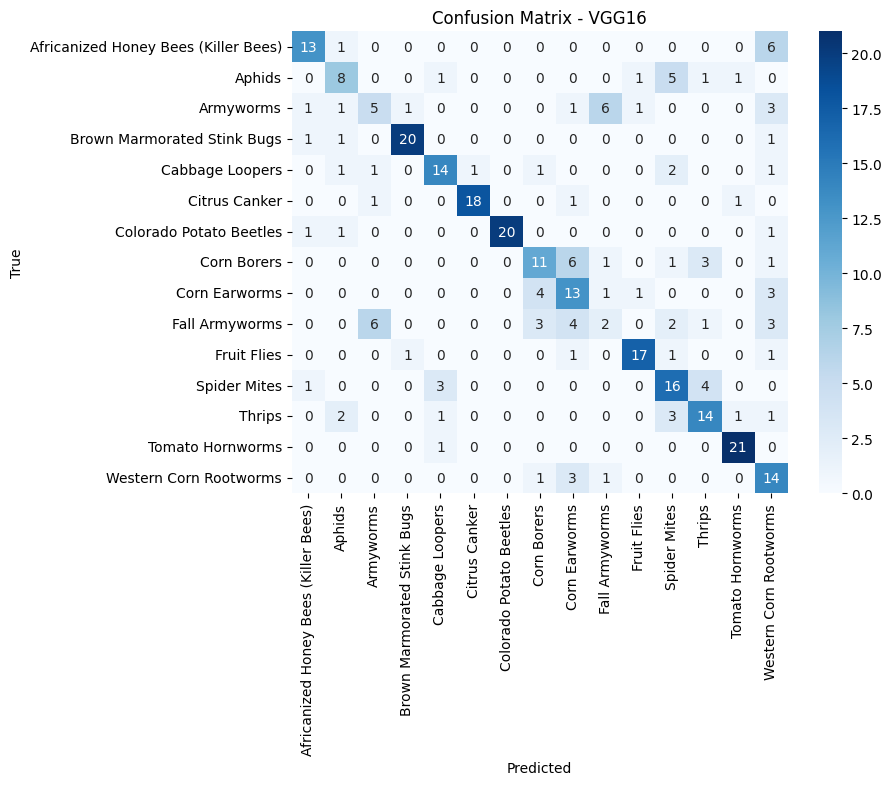


📊 Classification Report:

                                      precision    recall  f1-score   support

Africanized Honey Bees (Killer Bees)       0.76      0.65      0.70        20
                              Aphids       0.53      0.47      0.50        17
                           Armyworms       0.38      0.26      0.31        19
         Brown Marmorated Stink Bugs       0.91      0.87      0.89        23
                     Cabbage Loopers       0.70      0.67      0.68        21
                       Citrus Canker       0.95      0.86      0.90        21
             Colorado Potato Beetles       1.00      0.87      0.93        23
                         Corn Borers       0.55      0.48      0.51        23
                       Corn Earworms       0.45      0.59      0.51        22
                      Fall Armyworms       0.18      0.10      0.12        21
                         Fruit Flies       0.85      0.81      0.83        21
                        Spider Mites

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# ----------------------------
# 🔹 Fix for Transparent Images
# ----------------------------
def remove_transparency(img_path):
    img = Image.open(img_path).convert("RGBA")
    if img.mode == "RGBA":
        new_img = Image.new("RGB", img.size, (255, 255, 255))  # White background
        new_img.paste(img, mask=img.split()[3])  # Use alpha channel as mask
        return new_img
    return img.convert("RGB")  # Convert all images to RGB

class CustomImageFolder(ImageFolder):
    def __getitem__(self, index):
        path, target = self.samples[index]
        img = remove_transparency(path)  # Fix transparency issue
        if self.transform:
            img = self.transform(img)
        return img, target

# ----------------------
# 🔹 Define Device (GPU)
# ----------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------
# 🔹 Define Transformations
# -----------------------------
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# ----------------------
# 🔹 Load Dataset
# ----------------------
train_dataset = CustomImageFolder("/kaggle/working/train", transform=train_transform)
val_dataset = CustomImageFolder("/kaggle/working/val", transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=4)

num_classes = len(train_dataset.classes)
print("Number of classes:", num_classes)

# -----------------------------
# 🔹 Load Pretrained VGG16 Model
# -----------------------------
vgg16 = models.vgg16(weights=models.VGG16_Weights.DEFAULT)
vgg16.classifier[6] = nn.Linear(4096, num_classes)  # Modify classifier for custom classes
vgg16 = vgg16.to(device)

# -----------------------------
# 🔹 Define Loss & Optimizer
# -----------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16.parameters(), lr=0.0001)

# -----------------------------
# 🔹 Training Function
# -----------------------------
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct, total = 0, 0
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print(f"✅ Epoch {epoch+1} | Loss: {running_loss/len(train_loader):.4f} | Accuracy: {100 * correct/total:.2f}%")

# -----------------------------
# 🔹 Train VGG16 Model
# -----------------------------
train_model(vgg16, train_loader, criterion, optimizer, num_epochs=10)

# -----------------------------
# 🔹 Save Trained Model
# -----------------------------
torch.save(vgg16.state_dict(), "vgg16_trained.pth")
print("✅ Model saved successfully!")

# -----------------------------
# 🔹 Load Model for Evaluation
# -----------------------------
vgg16 = models.vgg16(weights=models.VGG16_Weights.DEFAULT)
vgg16.classifier[6] = nn.Linear(4096, num_classes)
vgg16.load_state_dict(torch.load("vgg16_trained.pth", weights_only=True))  # ✅ Fix Warning
vgg16 = vgg16.to(device)
vgg16.eval()

# -----------------------------
# 🔹 Model Evaluation Function
# -----------------------------
def evaluate_model(model, val_loader):
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc="Evaluating Model"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return all_labels, all_preds

# ✅ Evaluate the Model
true_labels, predicted_labels = evaluate_model(vgg16, val_loader)

# -----------------------------
# 🔹 Confusion Matrix
# -----------------------------
def plot_confusion_matrix(true_labels, predicted_labels, class_names):
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix - VGG16")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

# ✅ Plot the Confusion Matrix
plot_confusion_matrix(true_labels, predicted_labels, val_dataset.classes)

# -----------------------------
# 🔹 Classification Report
# -----------------------------
def print_classification_report(true_labels, predicted_labels, class_names):
    report = classification_report(true_labels, predicted_labels, target_names=class_names)
    print("\n📊 Classification Report:\n")
    print(report)

# ✅ Print the Classification Report
print_classification_report(true_labels, predicted_labels, val_dataset.classes)

Epoch 1/10: 100%|██████████| 79/79 [00:15<00:00,  5.15it/s]


Epoch 1: Loss: 1.9236, Accuracy: 47.66%


Epoch 2/10: 100%|██████████| 79/79 [00:15<00:00,  5.02it/s]


Epoch 2: Loss: 0.9266, Accuracy: 79.14%


Epoch 3/10: 100%|██████████| 79/79 [00:15<00:00,  5.21it/s]


Epoch 3: Loss: 0.5564, Accuracy: 87.95%


Epoch 4/10: 100%|██████████| 79/79 [00:15<00:00,  5.18it/s]


Epoch 4: Loss: 0.3366, Accuracy: 94.37%


Epoch 5/10: 100%|██████████| 79/79 [00:15<00:00,  4.98it/s]


Epoch 5: Loss: 0.2019, Accuracy: 96.59%


Epoch 6/10: 100%|██████████| 79/79 [00:15<00:00,  5.19it/s]


Epoch 6: Loss: 0.1713, Accuracy: 96.67%


Epoch 7/10: 100%|██████████| 79/79 [00:15<00:00,  5.08it/s]


Epoch 7: Loss: 0.1301, Accuracy: 97.15%


Epoch 8/10: 100%|██████████| 79/79 [00:15<00:00,  5.19it/s]


Epoch 8: Loss: 0.1088, Accuracy: 97.46%


Epoch 9/10: 100%|██████████| 79/79 [00:15<00:00,  5.04it/s]


Epoch 9: Loss: 0.0904, Accuracy: 98.33%


Epoch 10/10: 100%|██████████| 79/79 [00:15<00:00,  5.10it/s]


Epoch 10: Loss: 0.0784, Accuracy: 98.41%
Model training complete and saved.


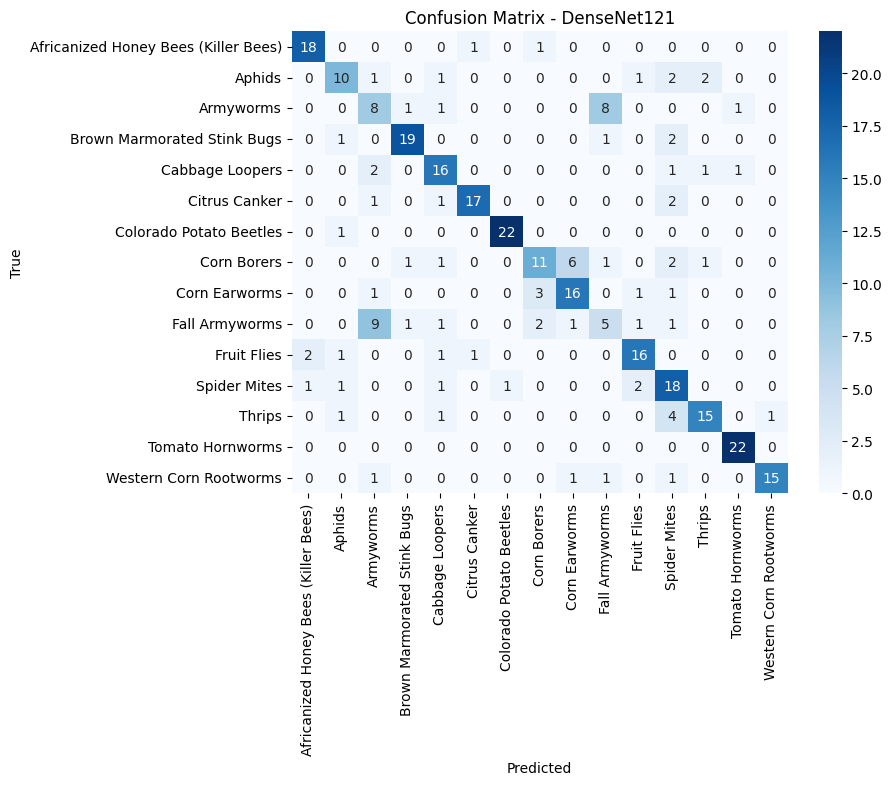

                                      precision    recall  f1-score   support

Africanized Honey Bees (Killer Bees)       0.86      0.90      0.88        20
                              Aphids       0.67      0.59      0.62        17
                           Armyworms       0.35      0.42      0.38        19
         Brown Marmorated Stink Bugs       0.86      0.83      0.84        23
                     Cabbage Loopers       0.67      0.76      0.71        21
                       Citrus Canker       0.89      0.81      0.85        21
             Colorado Potato Beetles       0.96      0.96      0.96        23
                         Corn Borers       0.65      0.48      0.55        23
                       Corn Earworms       0.67      0.73      0.70        22
                      Fall Armyworms       0.31      0.24      0.27        21
                         Fruit Flies       0.76      0.76      0.76        21
                        Spider Mites       0.53      0.75      

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from PIL import Image

# Define Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Fix Transparency Issue by Overriding ImageFolder
class FixedImageFolder(ImageFolder):
    def __getitem__(self, index):
        path, target = self.samples[index]
        img = Image.open(path)

        # Convert transparent images to RGB properly
        if img.mode == "P" or img.mode == "RGBA":
            img = img.convert("RGBA")
            new_img = Image.new("RGB", img.size, (255, 255, 255))  # White background
            new_img.paste(img, mask=img.split()[3])  # Apply transparency mask
            img = new_img

        img = img.convert("RGB")  # Final RGB conversion
        if self.transform is not None:
            img = self.transform(img)
        return img, target

# Define Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load Dataset with Fix
train_dataset = FixedImageFolder("/kaggle/working/train", transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4)
val_dataset = FixedImageFolder("/kaggle/working/val", transform=transform)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=4)
num_classes = len(train_dataset.classes)

# Load Pretrained DenseNet121
densenet = models.densenet121(weights=models.DenseNet121_Weights.DEFAULT)
densenet.classifier = nn.Linear(1024, num_classes)
densenet = densenet.to(device)

# Define Loss Function & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(densenet.parameters(), lr=0.0001)

# Train Model
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss, correct, total = 0.0, 0, 0
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        print(f"Epoch {epoch+1}: Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct/total:.2f}%")

train_model(densenet, train_loader, criterion, optimizer, num_epochs=10)
torch.save(densenet.state_dict(), "densenet121_trained.pth")
print("Model training complete and saved.")

# Evaluate Model
densenet.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = densenet(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=val_dataset.classes, yticklabels=val_dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - DenseNet121")
plt.show()

# Classification Report
print(classification_report(all_labels, all_preds, target_names=val_dataset.classes))

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 212MB/s]  
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 199MB/s] 
100%|██████████| 99/99 [00:45<00:00,  2.20it/s]


Epoch 1: Train Acc: 27.61%, Val Acc: 62.89%, Train Loss: 2.2497, Val Loss: 1.2428


100%|██████████| 99/99 [00:43<00:00,  2.26it/s]


Epoch 2: Train Acc: 63.08%, Val Acc: 85.53%, Train Loss: 1.2050, Val Loss: 0.5028


100%|██████████| 99/99 [00:44<00:00,  2.20it/s]


Epoch 3: Train Acc: 74.22%, Val Acc: 91.19%, Train Loss: 0.7505, Val Loss: 0.2592


100%|██████████| 99/99 [00:44<00:00,  2.21it/s]


Epoch 4: Train Acc: 82.01%, Val Acc: 95.28%, Train Loss: 0.5252, Val Loss: 0.1364


100%|██████████| 99/99 [00:43<00:00,  2.27it/s]


Epoch 5: Train Acc: 86.70%, Val Acc: 97.80%, Train Loss: 0.3750, Val Loss: 0.0826


100%|██████████| 99/99 [00:45<00:00,  2.18it/s]


Epoch 6: Train Acc: 90.69%, Val Acc: 98.74%, Train Loss: 0.2909, Val Loss: 0.0669


100%|██████████| 99/99 [00:44<00:00,  2.21it/s]


Epoch 7: Train Acc: 93.03%, Val Acc: 98.43%, Train Loss: 0.2077, Val Loss: 0.0505


100%|██████████| 99/99 [00:44<00:00,  2.20it/s]


Epoch 8: Train Acc: 93.98%, Val Acc: 98.11%, Train Loss: 0.1681, Val Loss: 0.0425


100%|██████████| 99/99 [00:44<00:00,  2.21it/s]


Epoch 9: Train Acc: 95.38%, Val Acc: 97.80%, Train Loss: 0.1380, Val Loss: 0.0361


100%|██████████| 99/99 [00:44<00:00,  2.22it/s]


Epoch 10: Train Acc: 95.76%, Val Acc: 98.74%, Train Loss: 0.1281, Val Loss: 0.0335


100%|██████████| 99/99 [00:45<00:00,  2.19it/s]


Epoch 11: Train Acc: 95.38%, Val Acc: 98.74%, Train Loss: 0.1279, Val Loss: 0.0334


100%|██████████| 99/99 [00:45<00:00,  2.20it/s]


Epoch 12: Train Acc: 95.50%, Val Acc: 98.74%, Train Loss: 0.1213, Val Loss: 0.0320


100%|██████████| 99/99 [00:45<00:00,  2.18it/s]


Epoch 13: Train Acc: 95.69%, Val Acc: 99.06%, Train Loss: 0.1258, Val Loss: 0.0310


100%|██████████| 99/99 [00:45<00:00,  2.20it/s]


Epoch 14: Train Acc: 96.26%, Val Acc: 98.74%, Train Loss: 0.1130, Val Loss: 0.0328


100%|██████████| 99/99 [00:44<00:00,  2.20it/s]


Epoch 15: Train Acc: 95.50%, Val Acc: 99.37%, Train Loss: 0.1182, Val Loss: 0.0305


100%|██████████| 99/99 [00:45<00:00,  2.18it/s]


Epoch 16: Train Acc: 94.74%, Val Acc: 98.43%, Train Loss: 0.1467, Val Loss: 0.0345


100%|██████████| 99/99 [00:45<00:00,  2.18it/s]


Epoch 17: Train Acc: 93.48%, Val Acc: 99.06%, Train Loss: 0.1761, Val Loss: 0.0430


100%|██████████| 99/99 [00:45<00:00,  2.17it/s]


Epoch 18: Train Acc: 94.30%, Val Acc: 99.06%, Train Loss: 0.1569, Val Loss: 0.0369


100%|██████████| 99/99 [00:45<00:00,  2.19it/s]


Epoch 19: Train Acc: 93.10%, Val Acc: 99.06%, Train Loss: 0.1957, Val Loss: 0.0378


100%|██████████| 99/99 [00:45<00:00,  2.19it/s]


Epoch 20: Train Acc: 94.93%, Val Acc: 98.43%, Train Loss: 0.1566, Val Loss: 0.0449


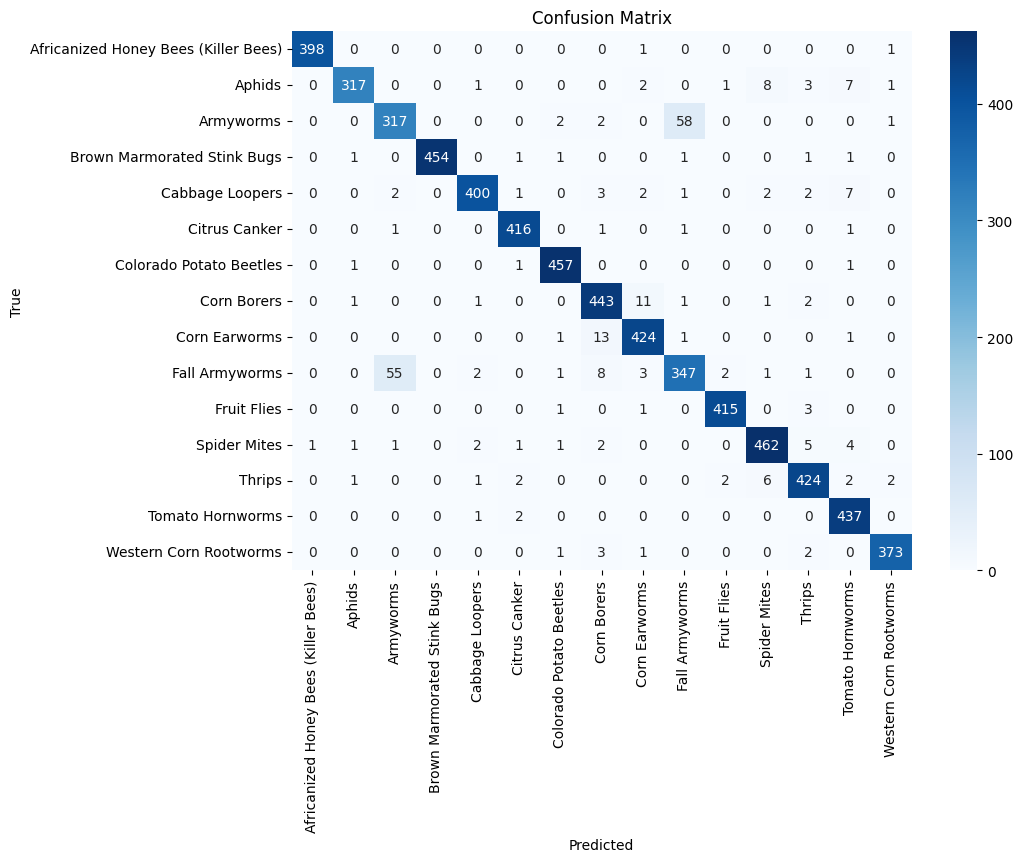

                                      precision    recall  f1-score   support

Africanized Honey Bees (Killer Bees)       1.00      0.99      1.00       400
                              Aphids       0.98      0.93      0.96       340
                           Armyworms       0.84      0.83      0.84       380
         Brown Marmorated Stink Bugs       1.00      0.99      0.99       460
                     Cabbage Loopers       0.98      0.95      0.97       420
                       Citrus Canker       0.98      0.99      0.99       420
             Colorado Potato Beetles       0.98      0.99      0.99       460
                         Corn Borers       0.93      0.96      0.95       460
                       Corn Earworms       0.95      0.96      0.96       440
                      Fall Armyworms       0.85      0.83      0.84       420
                         Fruit Flies       0.99      0.99      0.99       420
                        Spider Mites       0.96      0.96      

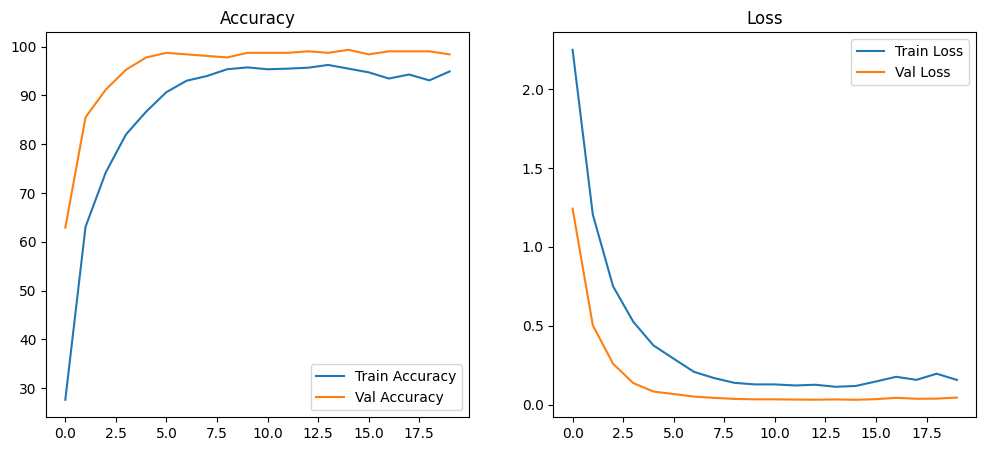

In [3]:
import gc
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, ConcatDataset
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch.amp
from sklearn.metrics import confusion_matrix, classification_report # Added import
import seaborn as sns
from PIL import Image
import random

# Define Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define Transformations
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    transforms.RandomErasing(p=0.1, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0) # Random Erasing
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Custom dataset to handle transparency issues
class TransparentImageFolder(ImageFolder):
    def __getitem__(self, index):
        path, label = self.samples[index]
        img = Image.open(path).convert("RGBA")  # Ensure RGBA conversion

        # Convert RGBA to RGB (removes transparency)
        img = img.convert("RGB")

        # Apply transform
        if self.transform is not None:
            img = self.transform(img)

        return img, label

# Load Dataset
train_dataset = TransparentImageFolder("/kaggle/working/train", transform=train_transform)
val_dataset = TransparentImageFolder("/kaggle/working/val", transform=val_transform)

# Combine training and validation datasets for training
full_train_dataset = ConcatDataset([train_dataset, val_dataset])
train_loader = DataLoader(full_train_dataset, batch_size=16, shuffle=True, num_workers=4) # Increased batch size, added num_workers
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=4) # Increased batch size, added num_workers


num_classes = len(train_dataset.classes)

# Define Hybrid Model 3 (VGG16 + ResNet50)
class HybridModel3(nn.Module):
    def __init__(self, num_classes):
        super(HybridModel3, self).__init__()
        
        # Load Pretrained Models
        self.vgg16 = models.vgg16(weights=models.VGG16_Weights.DEFAULT)
        self.resnet50 = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
        
        # Modify Classifiers
        self.vgg16.classifier[6] = nn.Sequential(
            nn.Linear(4096, 1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, 512)  # Add a layer
        )
        self.resnet50.fc = nn.Sequential(
            nn.Linear(2048, 1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, 512) # Add a layer
        )
        
        # Fully Connected Layer
        self.fc = nn.Linear(512 + 512, num_classes)  # VGG16 + ResNet50
        
    def forward(self, x):
        x1 = self.vgg16(x)
        x2 = self.resnet50(x)
        
        x = torch.cat([x1, x2], dim=1)
        x = self.fc(x)
        return x

# Initialize Model
model3 = HybridModel3(num_classes).to(device)

# Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model3.parameters(), lr=0.00005, weight_decay=1e-5) # Reduced lr, added weight decay
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10, eta_min=1e-6) # Learning rate scheduler

# Use mixed precision
scaler = torch.amp.GradScaler()

# Training Function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    train_acc, val_acc, train_loss, val_loss = [], [], [], []
    
    # Initialize confusion matrix lists
    all_preds = []
    all_labels = []
    
    for epoch in range(num_epochs):
        model.train()
        correct, total, running_loss = 0, 0, 0
        
        for images, labels in tqdm(train_loader):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            
            # Use mixed precision
            with torch.amp.autocast('cuda'):
                outputs = model(images)
                loss = criterion(outputs, labels)
            
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            # Clear memory
            del images, labels, outputs, loss, predicted
            torch.cuda.empty_cache()
            gc.collect()
        
        train_acc.append(100 * correct / total)
        train_loss.append(running_loss / len(train_loader))
        
        # Validation
        model.eval()
        correct, total, running_loss = 0, 0, 0
        epoch_preds = []
        epoch_labels = []
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                with torch.amp.autocast('cuda'):
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                running_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                
                # Collect predictions and labels for confusion matrix
                epoch_preds.extend(predicted.cpu().numpy())
                epoch_labels.extend(labels.cpu().numpy())
                
                # Clear memory
                del images, labels, outputs, loss, predicted
                torch.cuda.empty_cache()
                gc.collect()
        
        val_acc.append(100 * correct / total)
        val_loss.append(running_loss / len(val_loader))
        
        # Append the results for confusion matrix calculation
        all_preds.extend(epoch_preds)
        all_labels.extend(epoch_labels)
        
        print(f"Epoch {epoch+1}: Train Acc: {train_acc[-1]:.2f}%, Val Acc: {val_acc[-1]:.2f}%, Train Loss: {train_loss[-1]:.4f}, Val Loss: {val_loss[-1]:.4f}")
        
        # Step the scheduler
        scheduler.step()
        
        # Clear memory at the end of each epoch
        del correct, total, running_loss, epoch_preds, epoch_labels
        torch.cuda.empty_cache()
        gc.collect()
        
    # Confusion Matrix after all epochs
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_dataset.classes, yticklabels=val_dataset.classes) # Use val_dataset for class names
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    
    # Classification Report
    print(classification_report(all_labels, all_preds, target_names=val_dataset.classes)) # Use val_dataset for class names
    
    return train_acc, val_acc, train_loss, val_loss

# Train Hybrid Model 3
train_acc, val_acc, train_loss, val_loss = train_model(model3, train_loader, val_loader, criterion, optimizer, num_epochs=20)

# Plot Accuracy & Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.legend()
plt.title("Loss")
plt.show()

# Hybrid Model 4: MobileNetV3-Large + DenseNet201 + EfficientNet-B3

Using device: cuda


Epoch 1/20: 100%|██████████| 40/40 [00:15<00:00,  2.66it/s]


Epoch 1: Train Loss=94.9365, Train Acc=35.29%


Epoch 2/20: 100%|██████████| 40/40 [00:12<00:00,  3.31it/s]


Epoch 2: Train Loss=54.3750, Train Acc=67.96%


Epoch 3/20: 100%|██████████| 40/40 [00:13<00:00,  3.00it/s]


Epoch 3: Train Loss=31.1348, Train Acc=78.35%


Epoch 4/20: 100%|██████████| 40/40 [00:14<00:00,  2.85it/s]


Epoch 4: Train Loss=20.2787, Train Acc=84.54%


Epoch 5/20: 100%|██████████| 40/40 [00:15<00:00,  2.54it/s]


Epoch 5: Train Loss=14.6282, Train Acc=90.01%


Epoch 6/20: 100%|██████████| 40/40 [00:15<00:00,  2.56it/s]


Epoch 6: Train Loss=10.1364, Train Acc=92.86%


Epoch 7/20: 100%|██████████| 40/40 [00:12<00:00,  3.14it/s]


Epoch 7: Train Loss=8.0480, Train Acc=94.77%


Epoch 8/20: 100%|██████████| 40/40 [00:14<00:00,  2.77it/s]


Epoch 8: Train Loss=7.2700, Train Acc=94.85%


Epoch 9/20: 100%|██████████| 40/40 [00:14<00:00,  2.70it/s]


Epoch 9: Train Loss=5.8303, Train Acc=96.51%


Epoch 10/20: 100%|██████████| 40/40 [00:13<00:00,  2.94it/s]


Epoch 10: Train Loss=4.6513, Train Acc=96.99%


Epoch 11/20: 100%|██████████| 40/40 [00:12<00:00,  3.22it/s]


Epoch 11: Train Loss=3.2046, Train Acc=97.78%


Epoch 12/20: 100%|██████████| 40/40 [00:13<00:00,  2.90it/s]


Epoch 12: Train Loss=3.1759, Train Acc=97.94%


Epoch 13/20: 100%|██████████| 40/40 [00:13<00:00,  3.04it/s]


Epoch 13: Train Loss=2.3010, Train Acc=98.02%


Epoch 14/20: 100%|██████████| 40/40 [00:13<00:00,  2.91it/s]


Epoch 14: Train Loss=2.5899, Train Acc=97.86%


Epoch 15/20: 100%|██████████| 40/40 [00:12<00:00,  3.20it/s]


Epoch 15: Train Loss=2.3256, Train Acc=98.18%


Epoch 16/20: 100%|██████████| 40/40 [00:13<00:00,  2.89it/s]


Epoch 16: Train Loss=2.0690, Train Acc=98.33%


Epoch 17/20: 100%|██████████| 40/40 [00:12<00:00,  3.10it/s]


Epoch 17: Train Loss=1.6431, Train Acc=98.97%


Epoch 18/20: 100%|██████████| 40/40 [00:14<00:00,  2.84it/s]


Epoch 18: Train Loss=2.3793, Train Acc=98.26%


Epoch 19/20: 100%|██████████| 40/40 [00:13<00:00,  3.07it/s]


Epoch 19: Train Loss=1.6648, Train Acc=98.57%


Epoch 20/20: 100%|██████████| 40/40 [00:13<00:00,  3.03it/s]

Epoch 20: Train Loss=1.6547, Train Acc=98.49%


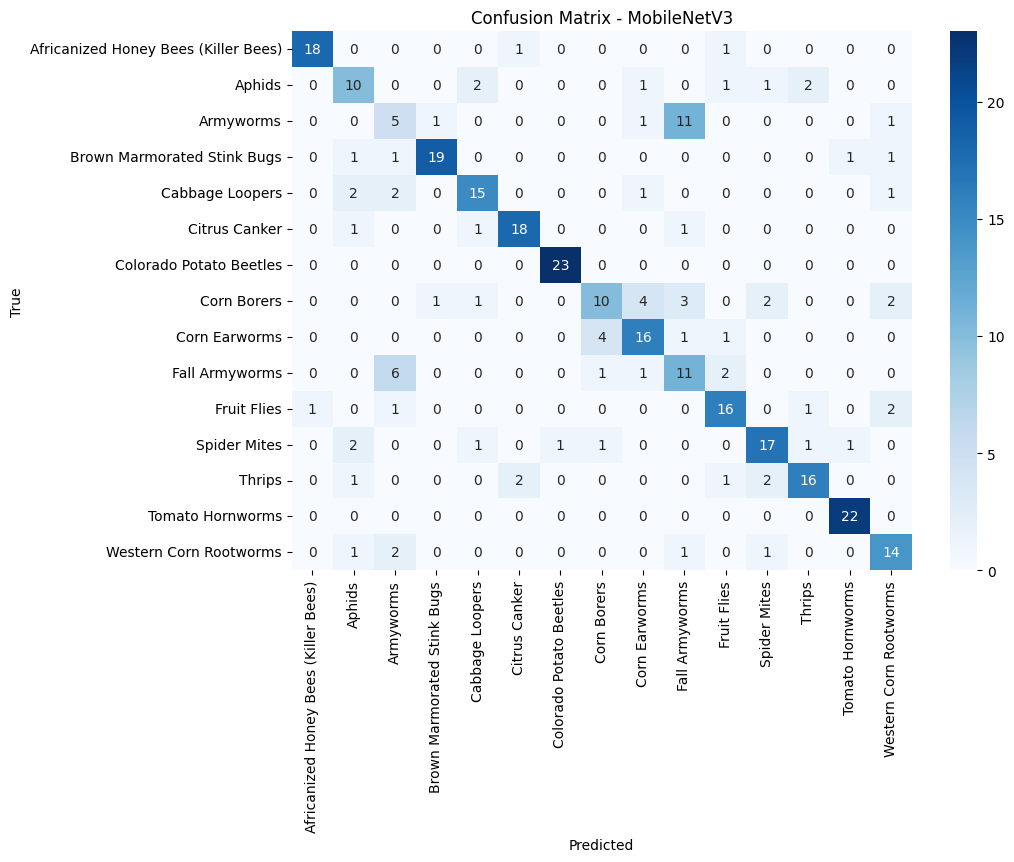

                                      precision    recall  f1-score   support

Africanized Honey Bees (Killer Bees)       0.95      0.90      0.92        20
                              Aphids       0.56      0.59      0.57        17
                           Armyworms       0.29      0.26      0.28        19
         Brown Marmorated Stink Bugs       0.90      0.83      0.86        23
                     Cabbage Loopers       0.75      0.71      0.73        21
                       Citrus Canker       0.86      0.86      0.86        21
             Colorado Potato Beetles       0.96      1.00      0.98        23
                         Corn Borers       0.62      0.43      0.51        23
                       Corn Earworms       0.67      0.73      0.70        22
                      Fall Armyworms       0.39      0.52      0.45        21
                         Fruit Flies       0.73      0.76      0.74        21
                        Spider Mites       0.74      0.71      

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from torch.utils.data import DataLoader, WeightedRandomSampler
from torchvision import models, transforms
from torchvision.datasets import ImageFolder
from tqdm import tqdm
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Custom dataset to handle transparent images
class TransparentImageFolder(ImageFolder):
    def __getitem__(self, index):
        path, label = self.samples[index]
        img = Image.open(path).convert("RGBA").convert("RGB")
        if self.transform:
            img = self.transform(img)
        return img, label

# Load datasets
train_dataset = TransparentImageFolder(root="/kaggle/working/train", transform=transform)
val_dataset = TransparentImageFolder(root="/kaggle/working/val", transform=transform)

# Compute class weights for balanced sampling
class_counts = np.array([sum(1 for label in train_dataset.targets if label == i) for i in range(len(train_dataset.classes))])
class_weights = 1. / torch.tensor(class_counts, dtype=torch.float)
sample_weights = [class_weights[label] for label in train_dataset.targets]
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

# Load MobileNetV3 model
mobilenet_v3 = models.mobilenet_v3_large(weights=models.MobileNet_V3_Large_Weights.DEFAULT)

# Modify classifier to match the number of classes
mobilenet_v3.classifier[3] = nn.Linear(1280, len(train_dataset.classes))

# Move model to correct device **AFTER** modifying classifier
mobilenet_v3 = mobilenet_v3.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mobilenet_v3.parameters(), lr=0.0001, weight_decay=1e-5)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    for epoch in range(num_epochs):
        model.train()
        total_loss, correct, total = 0, 0, 0

        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            images, labels = images.to(device), labels.to(device)  # Move to correct device
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            correct += (outputs.argmax(dim=1) == labels).sum().item()
            total += labels.size(0)

        train_acc = 100 * correct / total
        print(f"Epoch {epoch+1}: Train Loss={total_loss:.4f}, Train Acc={train_acc:.2f}%")

# Train the model
train_model(mobilenet_v3, train_loader, val_loader, criterion, optimizer)

# Evaluation function
def evaluate_model(model, val_loader):
    model.eval()
    true_labels, pred_labels = [], []

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  # Move to correct device
            outputs = model(images)
            pred_labels.extend(outputs.argmax(dim=1).cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    return true_labels, pred_labels

# Evaluate the model
true_labels, pred_labels = evaluate_model(mobilenet_v3, val_loader)

# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - MobileNetV3")
plt.show()

# Classification Report
print(classification_report(true_labels, pred_labels, target_names=train_dataset.classes))

Using device: cuda


Epoch 1/20: 100%|██████████| 40/40 [00:24<00:00,  1.65it/s]


Epoch 1: Train Loss=71.9827, Train Acc=56.15%


Epoch 2/20: 100%|██████████| 40/40 [00:23<00:00,  1.73it/s]


Epoch 2: Train Loss=31.7758, Train Acc=84.62%


Epoch 3/20: 100%|██████████| 40/40 [00:22<00:00,  1.81it/s]


Epoch 3: Train Loss=17.6437, Train Acc=89.61%


Epoch 4/20: 100%|██████████| 40/40 [00:22<00:00,  1.76it/s]


Epoch 4: Train Loss=11.3154, Train Acc=94.69%


Epoch 5/20: 100%|██████████| 40/40 [00:23<00:00,  1.71it/s]


Epoch 5: Train Loss=7.3653, Train Acc=96.43%


Epoch 6/20: 100%|██████████| 40/40 [00:22<00:00,  1.75it/s]


Epoch 6: Train Loss=5.0413, Train Acc=97.46%


Epoch 7/20: 100%|██████████| 40/40 [00:23<00:00,  1.72it/s]


Epoch 7: Train Loss=4.1845, Train Acc=97.30%


Epoch 8/20: 100%|██████████| 40/40 [00:22<00:00,  1.76it/s]


Epoch 8: Train Loss=3.3849, Train Acc=97.38%


Epoch 9/20: 100%|██████████| 40/40 [00:22<00:00,  1.76it/s]


Epoch 9: Train Loss=2.8805, Train Acc=98.02%


Epoch 10/20: 100%|██████████| 40/40 [00:22<00:00,  1.75it/s]


Epoch 10: Train Loss=2.4217, Train Acc=98.33%


Epoch 11/20: 100%|██████████| 40/40 [00:22<00:00,  1.75it/s]


Epoch 11: Train Loss=1.9922, Train Acc=98.49%


Epoch 12/20: 100%|██████████| 40/40 [00:23<00:00,  1.74it/s]


Epoch 12: Train Loss=2.1193, Train Acc=98.26%


Epoch 13/20: 100%|██████████| 40/40 [00:22<00:00,  1.74it/s]


Epoch 13: Train Loss=2.4905, Train Acc=98.33%


Epoch 14/20: 100%|██████████| 40/40 [00:23<00:00,  1.71it/s]


Epoch 14: Train Loss=3.0926, Train Acc=97.78%


Epoch 15/20: 100%|██████████| 40/40 [00:22<00:00,  1.75it/s]


Epoch 15: Train Loss=3.8437, Train Acc=97.15%


Epoch 16/20: 100%|██████████| 40/40 [00:23<00:00,  1.73it/s]


Epoch 16: Train Loss=3.4221, Train Acc=96.43%


Epoch 17/20: 100%|██████████| 40/40 [00:22<00:00,  1.74it/s]


Epoch 17: Train Loss=3.2354, Train Acc=96.59%


Epoch 18/20: 100%|██████████| 40/40 [00:23<00:00,  1.74it/s]


Epoch 18: Train Loss=2.1060, Train Acc=98.49%


Epoch 19/20: 100%|██████████| 40/40 [00:23<00:00,  1.73it/s]


Epoch 19: Train Loss=1.9831, Train Acc=98.81%


Epoch 20/20: 100%|██████████| 40/40 [00:22<00:00,  1.79it/s]

Epoch 20: Train Loss=2.0310, Train Acc=98.49%


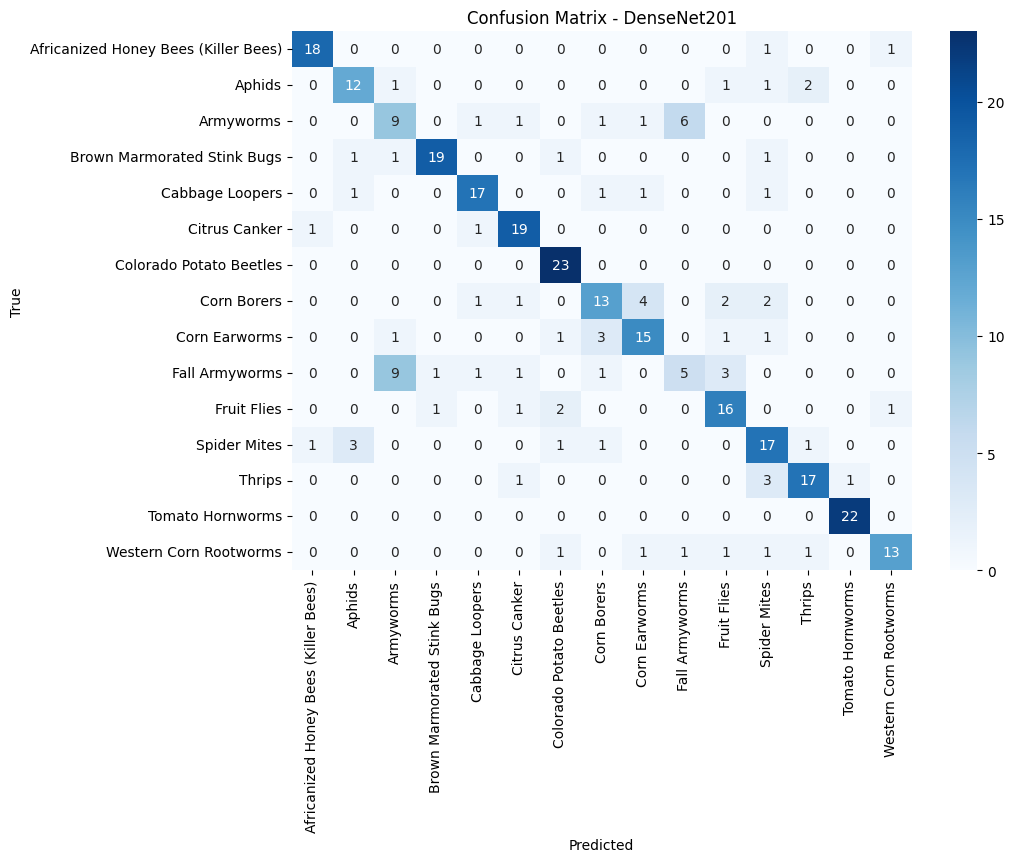

                                      precision    recall  f1-score   support

Africanized Honey Bees (Killer Bees)       0.90      0.90      0.90        20
                              Aphids       0.71      0.71      0.71        17
                           Armyworms       0.43      0.47      0.45        19
         Brown Marmorated Stink Bugs       0.90      0.83      0.86        23
                     Cabbage Loopers       0.81      0.81      0.81        21
                       Citrus Canker       0.79      0.90      0.84        21
             Colorado Potato Beetles       0.79      1.00      0.88        23
                         Corn Borers       0.65      0.57      0.60        23
                       Corn Earworms       0.68      0.68      0.68        22
                      Fall Armyworms       0.42      0.24      0.30        21
                         Fruit Flies       0.67      0.76      0.71        21
                        Spider Mites       0.61      0.71      

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from torch.utils.data import DataLoader, WeightedRandomSampler
from torchvision import models, transforms
from torchvision.datasets import ImageFolder
from tqdm import tqdm
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Custom dataset to handle transparent images
class TransparentImageFolder(ImageFolder):
    def __getitem__(self, index):
        path, label = self.samples[index]
        img = Image.open(path).convert("RGBA").convert("RGB")
        if self.transform:
            img = self.transform(img)
        return img, label

# Load datasets
train_dataset = TransparentImageFolder(root="/kaggle/working/train", transform=transform)
val_dataset = TransparentImageFolder(root="/kaggle/working/val", transform=transform)

# Compute class weights for balanced sampling
class_counts = np.array([sum(1 for label in train_dataset.targets if label == i) for i in range(len(train_dataset.classes))])
class_weights = 1. / torch.tensor(class_counts, dtype=torch.float)
sample_weights = [class_weights[label] for label in train_dataset.targets]
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

# Load DenseNet201 model
densenet201 = models.densenet201(weights=models.DenseNet201_Weights.DEFAULT)

# Modify classifier to match the number of classes
densenet201.classifier = nn.Linear(1920, len(train_dataset.classes))

# Move model to correct device **AFTER** modifying classifier
densenet201 = densenet201.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(densenet201.parameters(), lr=0.0001, weight_decay=1e-5)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    for epoch in range(num_epochs):
        model.train()
        total_loss, correct, total = 0, 0, 0

        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            images, labels = images.to(device), labels.to(device)  # Move to correct device
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            correct += (outputs.argmax(dim=1) == labels).sum().item()
            total += labels.size(0)

        train_acc = 100 * correct / total
        print(f"Epoch {epoch+1}: Train Loss={total_loss:.4f}, Train Acc={train_acc:.2f}%")

# Train the model
train_model(densenet201, train_loader, val_loader, criterion, optimizer)

# Evaluation function
def evaluate_model(model, val_loader):
    model.eval()
    true_labels, pred_labels = [], []

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  # Move to correct device
            outputs = model(images)
            pred_labels.extend(outputs.argmax(dim=1).cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    return true_labels, pred_labels

# Evaluate the model
true_labels, pred_labels = evaluate_model(densenet201, val_loader)

# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - DenseNet201")
plt.show()

# Classification Report
print(classification_report(true_labels, pred_labels, target_names=train_dataset.classes))

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from PIL import Image

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define a custom loader to convert images to RGB (fix for transparency issue)
def rgb_loader(path):
    with open(path, 'rb') as f:
        img = Image.open(f)
        return img.convert('RGB')  # Convert image to RGB mode

# Define data transformations
transform = transforms.Compose([
    transforms.Resize((300, 300)),  # EfficientNet-B3 requires (300, 300)
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load dataset with the custom loader
train_dataset = datasets.ImageFolder(root="/kaggle/working/train", transform=transform, loader=rgb_loader)
val_dataset = datasets.ImageFolder(root="/kaggle/working/val", transform=transform, loader=rgb_loader)

# Data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=2)

# Load EfficientNet-B3 model
efficientnet_b3 = models.efficientnet_b3(weights=models.EfficientNet_B3_Weights.DEFAULT)
efficientnet_b3.classifier = nn.Linear(1536, len(train_dataset.classes))  # Adjust classifier
efficientnet_b3 = efficientnet_b3.to(device)  # Move model to GPU/CPU

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(efficientnet_b3.parameters(), lr=0.0001, weight_decay=1e-5)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)  # Move to correct device
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")
    
    print("Training complete!")

# Evaluate function
def evaluate_model(model, val_loader):
    model.eval()
    true_labels = []
    pred_labels = []
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            true_labels.extend(labels.cpu().numpy())
            pred_labels.extend(preds.cpu().numpy())
    return true_labels, pred_labels

# Train the model
train_model(efficientnet_b3, train_loader, val_loader, criterion, optimizer)

# Evaluate the model
true_labels, pred_labels = evaluate_model(efficientnet_b3, val_loader)

# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - EfficientNet-B3")
plt.show()

# Classification Report
print(classification_report(true_labels, pred_labels, target_names=train_dataset.classes))

Using device: cuda


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [1/10], Loss: 2.4231


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-5c1a4163.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-5c1a4163.pth


Using device: cuda


100%|██████████| 21.1M/21.1M [00:00<00:00, 177MB/s]
Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth
100%|██████████| 77.4M/77.4M [00:00<00:00, 177MB/s]


Epoch 1: Train Loss=2.6867, Train Acc=10.39%, Val Loss=2.6487, Val Acc=22.33%


Epoch 2: Train Loss=2.6111, Train Acc=21.89%, Val Loss=2.5866, Val Acc=38.36%


Epoch 3: Train Loss=2.5410, Train Acc=34.97%, Val Loss=2.5163, Val Acc=49.06%


Epoch 4: Train Loss=2.4697, Train Acc=42.74%, Val Loss=2.4459, Val Acc=52.83%


Epoch 5: Train Loss=2.3791, Train Acc=52.10%, Val Loss=2.3640, Val Acc=55.66%


Epoch 6: Train Loss=2.2887, Train Acc=55.43%, Val Loss=2.2804, Val Acc=58.49%


Epoch 7: Train Loss=2.2022, Train Acc=58.13%, Val Loss=2.1988, Val Acc=58.18%


Epoch 8: Train Loss=2.1025, Train Acc=61.54%, Val Loss=2.1180, Val Acc=59.75%


Epoch 9: Train Loss=2.0330, Train Acc=61.14%, Val Loss=2.0338, Val Acc=62.89%


Epoch 10: Train Loss=1.9555, Train Acc=64.47%, Val Loss=1.9567, Val Acc=60.69%


Epoch 11: Train Loss=1.8435, Train Acc=67.80%, Val Loss=1.8870, Val Acc=64.47%


Epoch 12: Train Loss=1.7525, Train Acc=70.02%, Val Loss=1.8149, Val Acc=62.26%


Epoch 13: Train Loss=1.7052, Train Acc=69.15%, Val Loss=1.7520, Val Acc=63.52%


Epoch 14: Train Loss=1.6492, Train Acc=69.47%, Val Loss=1.7005, Val Acc=65.41%


Epoch 15: Train Loss=1.5683, Train Acc=70.74%, Val Loss=1.6409, Val Acc=65.41%


Epoch 16: Train Loss=1.4949, Train Acc=73.67%, Val Loss=1.5846, Val Acc=66.04%


Epoch 17: Train Loss=1.4398, Train Acc=73.28%, Val Loss=1.5439, Val Acc=66.04%


Epoch 18: Train Loss=1.3933, Train Acc=76.05%, Val Loss=1.5051, Val Acc=66.04%


Epoch 19: Train Loss=1.3506, Train Acc=73.59%, Val Loss=1.4683, Val Acc=66.98%


Epoch 20: Train Loss=1.3193, Train Acc=75.26%, Val Loss=1.4354, Val Acc=64.78%


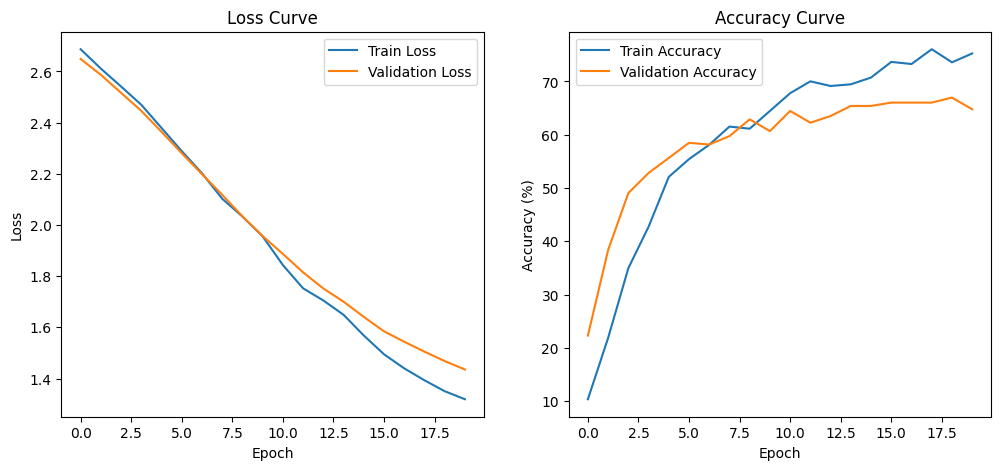

Evaluating on Validation Set: 100%|██████████| 10/10 [00:04<00:00,  2.27it/s]


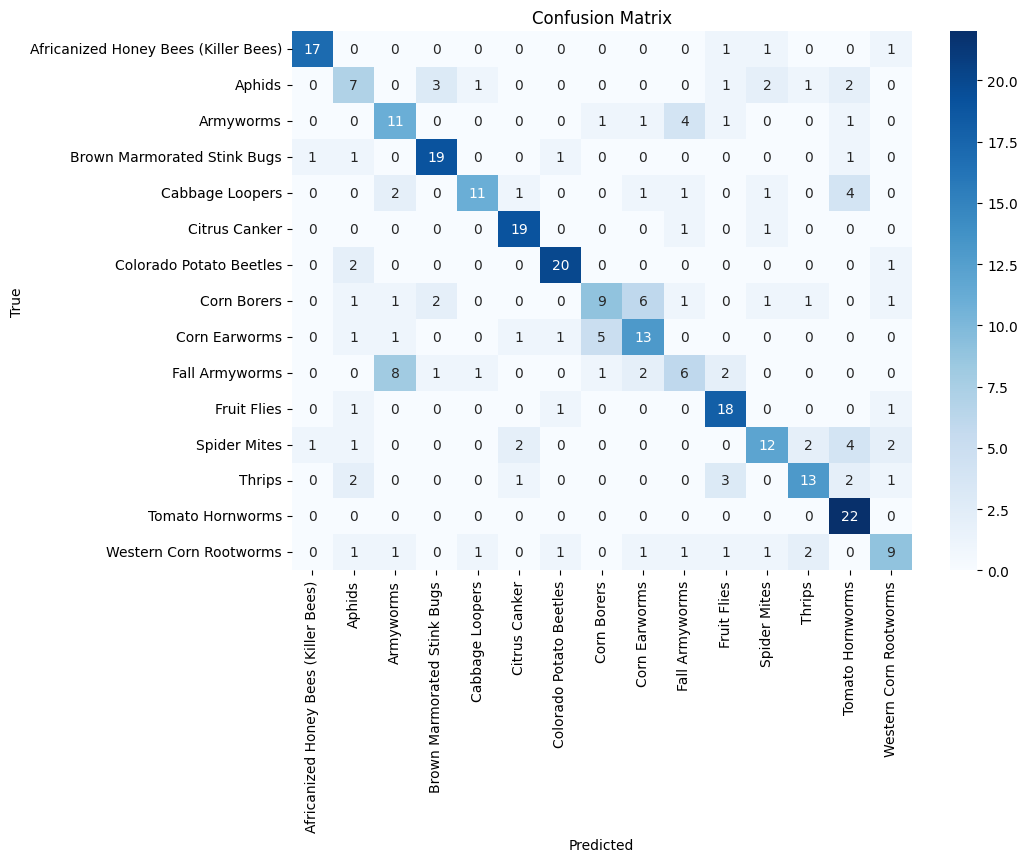

Classification Report:
                                       precision    recall  f1-score   support

Africanized Honey Bees (Killer Bees)       0.89      0.85      0.87        20
                              Aphids       0.41      0.41      0.41        17
                           Armyworms       0.46      0.58      0.51        19
         Brown Marmorated Stink Bugs       0.76      0.83      0.79        23
                     Cabbage Loopers       0.79      0.52      0.63        21
                       Citrus Canker       0.79      0.90      0.84        21
             Colorado Potato Beetles       0.83      0.87      0.85        23
                         Corn Borers       0.56      0.39      0.46        23
                       Corn Earworms       0.54      0.59      0.57        22
                      Fall Armyworms       0.43      0.29      0.34        21
                         Fruit Flies       0.67      0.86      0.75        21
                        Spider Mites   

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from torch.utils.data import DataLoader
from torchvision import models, transforms
from torchvision.datasets import ImageFolder
from tqdm import tqdm
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
from torch.utils.data import WeightedRandomSampler

# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define Image Transformations
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Custom dataset to handle transparency (RGBA images)
class TransparentImageFolder(ImageFolder):
    def __getitem__(self, index):
        path, label = self.samples[index]
        img = Image.open(path).convert("RGBA")
        img = img.convert("RGB")
        if self.transform:
            img = self.transform(img)
        return img, label

# Load Datasets
train_dataset = TransparentImageFolder(root="/kaggle/working/train", transform=train_transform)
val_dataset = TransparentImageFolder(root="/kaggle/working/val", transform=val_transform)

# Class balancing
class_counts = np.array([sum(1 for label in train_dataset.targets if label == i) for i in range(len(train_dataset.classes))])
class_weights = 1. / torch.tensor(class_counts, dtype=torch.float)
sample_weights = [class_weights[label] for label in train_dataset.targets]
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

# Load Pretrained Models
mobilenet_v3 = models.mobilenet_v3_large(weights=models.MobileNet_V3_Large_Weights.DEFAULT).to(device)
densenet201 = models.densenet201(weights=models.DenseNet201_Weights.DEFAULT).to(device)
efficientnet_b3 = models.efficientnet_b3(weights=models.EfficientNet_B3_Weights.DEFAULT).to(device)

# Modify Output Layers
mobilenet_v3.classifier[3] = nn.Identity()
densenet201.classifier = nn.Identity()
efficientnet_b3.classifier = nn.Identity()

# Unfreeze last few layers of each model
for param in mobilenet_v3.features[-3:].parameters():
    param.requires_grad = True
for param in densenet201.features[-5:].parameters():
    param.requires_grad = True
for param in efficientnet_b3.features[-5:].parameters():
    param.requires_grad = True

# Define Hybrid Model 4
class HybridModel4(nn.Module):
    def __init__(self, mobilenet, densenet, efficientnet, num_classes):
        super(HybridModel4, self).__init__()
        self.mobilenet = mobilenet
        self.densenet = densenet
        self.efficientnet = efficientnet

        self.fc = nn.Sequential(
            nn.Linear(1280 + 1920 + 1536, 1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, num_classes)
        )

    def forward(self, x):
        x1 = self.mobilenet(x)
        x2 = self.densenet(x)
        x3 = self.efficientnet(x)

        x = torch.cat((x1, x2, x3), dim=1)
        x = self.fc(x)
        return x

# Define number of classes
num_classes = len(train_dataset.classes)
class_names = train_dataset.classes

# Initialize Model
model4 = HybridModel4(mobilenet_v3, densenet201, efficientnet_b3, num_classes).to(device)

# Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model4.fc.parameters(), lr=0.00001, weight_decay=1e-5) # Reduced learning rate and added weight decay

# Training Function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20): # Increased to 20 epochs
    train_losses, val_losses = [], []
    train_acc, val_acc = [], []

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        correct = 0
        total = 0

        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)
        for images, labels in progress_bar:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            progress_bar.set_postfix(loss=total_loss / (total + 1), accuracy=100 * correct / total)

        epoch_loss = total_loss / len(train_loader)
        epoch_acc = 100 * correct / total
        train_losses.append(epoch_loss)
        train_acc.append(epoch_acc)

        # Validation
        model.eval()
        correct = 0
        total = 0
        val_loss = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

        val_losses.append(val_loss / len(val_loader))
        val_acc.append(100 * correct / total)

        print(f"Epoch {epoch+1}: Train Loss={epoch_loss:.4f}, Train Acc={epoch_acc:.2f}%, Val Loss={val_losses[-1]:.4f}, Val Acc={val_acc[-1]:.2f}%")

    return train_losses, val_losses, train_acc, val_acc

# Train Hybrid Model 4
train_losses, val_losses, train_acc, val_acc = train_model(model4, train_loader, val_loader, criterion, optimizer, num_epochs=20)

# Plot Loss and Accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_acc, label="Train Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Curve")
plt.legend()
plt.show()

# Model Evaluation
def evaluate_model(model, val_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc="Evaluating on Validation Set"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return all_labels, all_preds

true_labels, pred_labels = evaluate_model(model4, val_loader)

# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(true_labels, pred_labels, target_names=class_names))

In [29]:
import torch
import gc

def clear_gpu_memory():
    """
    Clears the GPU memory by deleting all tensors and emptying the cache.
    """
    if torch.cuda.is_available():
        # Collect names of GPU tensors
        tensor_names = [name for name, obj in globals().items() if isinstance(obj, torch.Tensor)]
        
        # Delete GPU tensors
        for name in tensor_names:
            del globals()[name]

        # Run garbage collection
        gc.collect()

        # Empty the CUDA cache
        torch.cuda.empty_cache()
        print("GPU memory cleared.")
    else:
        print("No GPU available to clear.")

# Example usage:
clear_gpu_memory()

GPU memory cleared.


# Hybrid Model 5: Efficient NetB2, Inception Net V3, Resnet101, VGG19)

Epoch 1: Train Acc: 20.70%, Val Acc: 49.37%, Train Loss: 4.7331, Val Loss: 1.7816


Epoch 2: Train Acc: 52.26%, Val Acc: 61.95%, Train Loss: 2.4494, Val Loss: 1.2278


Epoch 3: Train Acc: 66.61%, Val Acc: 68.55%, Train Loss: 1.5943, Val Loss: 0.9803


Epoch 4: Train Acc: 73.83%, Val Acc: 71.38%, Train Loss: 1.2232, Val Loss: 0.8879


Epoch 5: Train Acc: 78.35%, Val Acc: 73.27%, Train Loss: 0.9437, Val Loss: 0.8384


Epoch 6: Train Acc: 82.55%, Val Acc: 72.64%, Train Loss: 0.7860, Val Loss: 0.8439


Epoch 7: Train Acc: 87.39%, Val Acc: 75.79%, Train Loss: 0.6302, Val Loss: 0.8302


Epoch 8: Train Acc: 86.60%, Val Acc: 76.10%, Train Loss: 0.5546, Val Loss: 0.8301


Epoch 9: Train Acc: 89.53%, Val Acc: 74.53%, Train Loss: 0.4831, Val Loss: 0.8444


Epoch 10: Train Acc: 90.80%, Val Acc: 74.53%, Train Loss: 0.3936, Val Loss: 0.9131


Epoch 11: Train Acc: 91.59%, Val Acc: 72.96%, Train Loss: 0.3974, Val Loss: 0.9232


Epoch 12: Train Acc: 92.78%, Val Acc: 73.90%, Train Loss: 0.3312, Val Loss: 0.9019


Epoch 13: Train Acc: 94.45%, Val Acc: 74.84%, Train Loss: 0.2813, Val Loss: 0.9066
Early stopping.


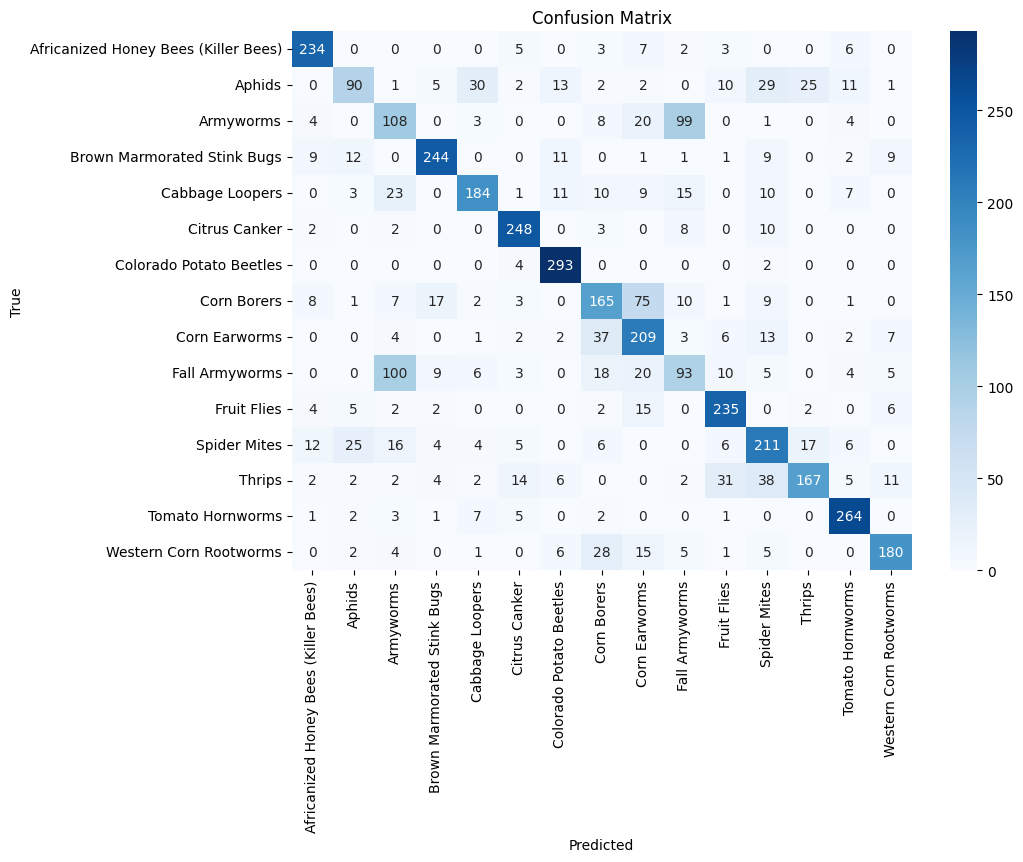

Classification Report:
                                       precision    recall  f1-score   support

Africanized Honey Bees (Killer Bees)       0.85      0.90      0.87       260
                              Aphids       0.63      0.41      0.50       221
                           Armyworms       0.40      0.44      0.42       247
         Brown Marmorated Stink Bugs       0.85      0.82      0.83       299
                     Cabbage Loopers       0.77      0.67      0.72       273
                       Citrus Canker       0.85      0.91      0.88       273
             Colorado Potato Beetles       0.86      0.98      0.91       299
                         Corn Borers       0.58      0.55      0.57       299
                       Corn Earworms       0.56      0.73      0.63       286
                      Fall Armyworms       0.39      0.34      0.36       273
                         Fruit Flies       0.77      0.86      0.81       273
                        Spider Mites   

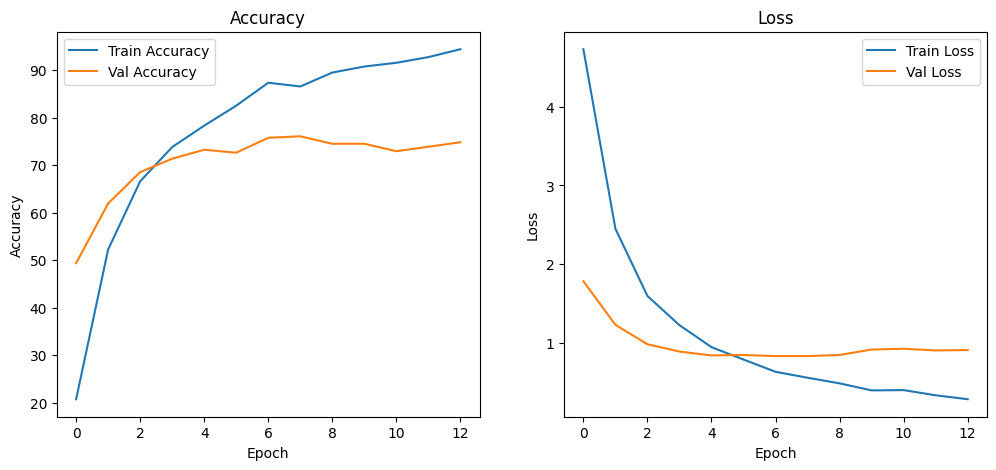

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, WeightedRandomSampler
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transforms
train_transform = transforms.Compose([
    transforms.Resize((340, 340)),
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(0.2, 0.2, 0.2, 0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((340, 340)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Dataset
train_dataset = ImageFolder("/kaggle/working/train", transform=train_transform)
val_dataset = ImageFolder("/kaggle/working/val", transform=val_transform)

# Class balancing
class_counts = np.array([sum(1 for label in train_dataset.targets if label == i) for i in range(len(train_dataset.classes))])
class_weights = 1. / torch.tensor(class_counts, dtype=torch.float)
sample_weights = [class_weights[label] for label in train_dataset.targets]
sampler = WeightedRandomSampler(sample_weights, len(sample_weights), replacement=True)

train_loader = DataLoader(train_dataset, batch_size=16, sampler=sampler, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=2)
num_classes = len(train_dataset.classes)

# Load InceptionV3 model with aux_logits=True
model = models.inception_v3(weights=models.Inception_V3_Weights.DEFAULT, aux_logits=True)
model.fc = nn.Sequential(
    nn.BatchNorm1d(2048),
    nn.Dropout(0.5),
    nn.Linear(2048, num_classes)
)
model = model.to(device)

# Loss, optimizer, scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=5e-5, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.1)
scaler = torch.amp.GradScaler()

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=30, scheduler=None, patience=5):
    train_acc, val_acc, train_loss, val_loss = [], [], [], []
    best_val_loss = float('inf')
    epochs_since_improvement = 0
    all_preds, all_labels = [], []

    for epoch in range(num_epochs):
        model.train()
        correct, total, running_loss = 0, 0, 0

        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()

            with torch.amp.autocast(device_type='cuda' if torch.cuda.is_available() else 'cpu'):
                outputs, aux_outputs = model(images)
                loss_main = criterion(outputs, labels)
                loss_aux = criterion(aux_outputs, labels)
                loss = loss_main + 0.4 * loss_aux  # weighted aux loss

            scaler.scale(loss).backward()
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            scaler.step(optimizer)
            scaler.update()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_acc.append(100 * correct / total)
        train_loss.append(running_loss / len(train_loader))

        # Validation
        model.eval()
        correct, total, running_loss = 0, 0, 0
        epoch_preds, epoch_labels = [], []
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                with torch.amp.autocast(device_type='cuda' if torch.cuda.is_available() else 'cpu'):
                    outputs = model(images)  # only main output in eval
                    loss = criterion(outputs, labels)
                running_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                epoch_preds.extend(predicted.cpu().numpy())
                epoch_labels.extend(labels.cpu().numpy())

        val_acc.append(100 * correct / total)
        val_loss.append(running_loss / len(val_loader))

        print(f"Epoch {epoch+1}: Train Acc: {train_acc[-1]:.2f}%, Val Acc: {val_acc[-1]:.2f}%, Train Loss: {train_loss[-1]:.4f}, Val Loss: {val_loss[-1]:.4f}")

        all_preds.extend(epoch_preds)
        all_labels.extend(epoch_labels)

        # Early stopping
        if val_loss[-1] < best_val_loss:
            best_val_loss = val_loss[-1]
            epochs_since_improvement = 0
            torch.save(model.state_dict(), 'inception_best.pth')
        else:
            epochs_since_improvement += 1
            if epochs_since_improvement >= patience:
                print("Early stopping.")
                break

        if scheduler:
            scheduler.step(val_loss[-1])

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    print("Classification Report:\n", classification_report(all_labels, all_preds, target_names=train_dataset.classes))

    return train_acc, val_acc, train_loss, val_loss

# Train
train_acc, val_acc, train_loss, val_loss = train_model(model, train_loader, val_loader, criterion, optimizer, scheduler=scheduler)

# Plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Downloading: "https://download.pytorch.org/models/resnet101-cd907fc2.pth" to /root/.cache/torch/hub/checkpoints/resnet101-cd907fc2.pth
100%|██████████| 171M/171M [00:00<00:00, 193MB/s] 
Epoch 1/30: 100%|██████████| 79/79 [00:25<00:00,  3.11it/s]


Epoch 1: Train Acc: 12.29%, Val Acc: 27.99%, Train Loss: 2.7618, Val Loss: 2.4597


Epoch 2/30: 100%|██████████| 79/79 [00:26<00:00,  2.96it/s]


Epoch 2: Train Acc: 31.25%, Val Acc: 49.69%, Train Loss: 2.2180, Val Loss: 1.8843


Epoch 3/30: 100%|██████████| 79/79 [00:26<00:00,  3.02it/s]


Epoch 3: Train Acc: 50.28%, Val Acc: 60.38%, Train Loss: 1.6696, Val Loss: 1.4051


Epoch 4/30: 100%|██████████| 79/79 [00:26<00:00,  3.03it/s]


Epoch 4: Train Acc: 64.95%, Val Acc: 63.84%, Train Loss: 1.2347, Val Loss: 1.1401


Epoch 5/30: 100%|██████████| 79/79 [00:26<00:00,  2.99it/s]


Epoch 5: Train Acc: 71.05%, Val Acc: 68.87%, Train Loss: 0.9709, Val Loss: 0.9607


Epoch 6/30: 100%|██████████| 79/79 [00:26<00:00,  3.03it/s]


Epoch 6: Train Acc: 78.59%, Val Acc: 73.27%, Train Loss: 0.7605, Val Loss: 0.8451


Epoch 7/30: 100%|██████████| 79/79 [00:27<00:00,  2.89it/s]


Epoch 7: Train Acc: 81.21%, Val Acc: 73.27%, Train Loss: 0.6061, Val Loss: 0.7880


Epoch 8/30: 100%|██████████| 79/79 [00:25<00:00,  3.11it/s]


Epoch 8: Train Acc: 84.30%, Val Acc: 74.21%, Train Loss: 0.5109, Val Loss: 0.7695


Epoch 9/30: 100%|██████████| 79/79 [00:27<00:00,  2.88it/s]


Epoch 9: Train Acc: 87.07%, Val Acc: 77.04%, Train Loss: 0.4267, Val Loss: 0.7340


Epoch 10/30: 100%|██████████| 79/79 [00:25<00:00,  3.07it/s]


Epoch 10: Train Acc: 89.29%, Val Acc: 74.84%, Train Loss: 0.3585, Val Loss: 0.7436


Epoch 11/30: 100%|██████████| 79/79 [00:25<00:00,  3.05it/s]


Epoch 11: Train Acc: 90.64%, Val Acc: 76.10%, Train Loss: 0.3143, Val Loss: 0.7503


Epoch 12/30: 100%|██████████| 79/79 [00:26<00:00,  2.96it/s]


Epoch 12: Train Acc: 92.07%, Val Acc: 77.04%, Train Loss: 0.2508, Val Loss: 0.7940


Epoch 13/30: 100%|██████████| 79/79 [00:25<00:00,  3.07it/s]


Epoch 13: Train Acc: 92.23%, Val Acc: 74.84%, Train Loss: 0.2304, Val Loss: 0.7992


Epoch 14/30: 100%|██████████| 79/79 [00:26<00:00,  3.00it/s]


Epoch 14: Train Acc: 94.69%, Val Acc: 75.79%, Train Loss: 0.1700, Val Loss: 0.7777
Early stopping.


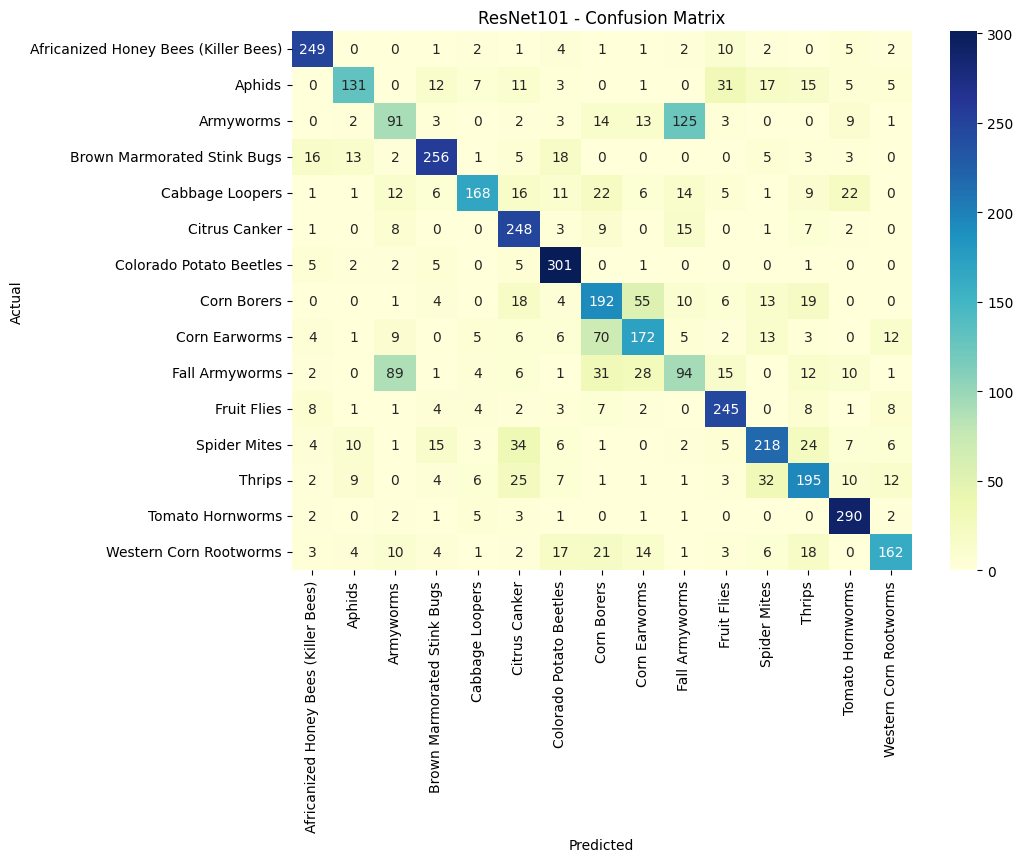

Classification Report:
                                       precision    recall  f1-score   support

Africanized Honey Bees (Killer Bees)       0.84      0.89      0.86       280
                              Aphids       0.75      0.55      0.64       238
                           Armyworms       0.40      0.34      0.37       266
         Brown Marmorated Stink Bugs       0.81      0.80      0.80       322
                     Cabbage Loopers       0.82      0.57      0.67       294
                       Citrus Canker       0.65      0.84      0.73       294
             Colorado Potato Beetles       0.78      0.93      0.85       322
                         Corn Borers       0.52      0.60      0.56       322
                       Corn Earworms       0.58      0.56      0.57       308
                      Fall Armyworms       0.35      0.32      0.33       294
                         Fruit Flies       0.75      0.83      0.79       294
                        Spider Mites   

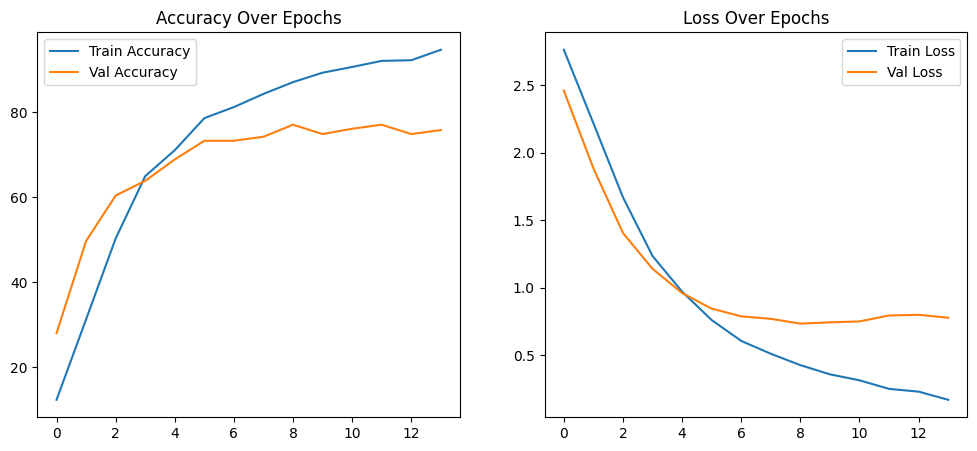

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, WeightedRandomSampler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transforms
train_transform = transforms.Compose([
    transforms.Resize((340, 340)),
    transforms.RandomRotation(25),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(0.3, 0.3, 0.3, 0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((340, 340)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Datasets
train_dataset = ImageFolder("/kaggle/working/train", transform=train_transform)
val_dataset = ImageFolder("/kaggle/working/val", transform=val_transform)

# Weighted sampling
class_counts = np.bincount(train_dataset.targets)
class_weights = 1. / class_counts
sample_weights = [class_weights[label] for label in train_dataset.targets]
sampler = WeightedRandomSampler(sample_weights, len(sample_weights), replacement=True)

train_loader = DataLoader(train_dataset, batch_size=16, sampler=sampler, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=4)
num_classes = len(train_dataset.classes)

# Model
model = models.resnet101(weights=models.ResNet101_Weights.DEFAULT)
model.fc = nn.Sequential(
    nn.BatchNorm1d(2048),
    nn.Dropout(0.5),
    nn.Linear(2048, num_classes)
)
model = model.to(device)

# Optimizer, Loss, Scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=3e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.1)
scaler = torch.amp.GradScaler()

# Training Function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=30, scheduler=None, patience=5):
    train_acc, val_acc, train_loss, val_loss = [], [], [], []
    best_val_loss = float('inf')
    early_stop_counter = 0
    all_preds, all_labels = [], []

    for epoch in range(num_epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()

            with torch.amp.autocast('cuda'):
                outputs = model(images)
                loss = criterion(outputs, labels)

            scaler.scale(loss).backward()
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            scaler.step(optimizer)
            scaler.update()

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (preds == labels).sum().item()

        train_acc.append(100 * correct / total)
        train_loss.append(running_loss / len(train_loader))

        # Validation
        model.eval()
        running_loss, correct, total = 0.0, 0, 0
        val_preds, val_targets = [], []
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                with torch.amp.autocast('cuda'):
                    outputs = model(images)
                    loss = criterion(outputs, labels)

                running_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (preds == labels).sum().item()

                val_preds.extend(preds.cpu().numpy())
                val_targets.extend(labels.cpu().numpy())

        val_acc.append(100 * correct / total)
        val_loss.append(running_loss / len(val_loader))

        print(f"Epoch {epoch+1}: Train Acc: {train_acc[-1]:.2f}%, Val Acc: {val_acc[-1]:.2f}%, Train Loss: {train_loss[-1]:.4f}, Val Loss: {val_loss[-1]:.4f}")

        all_preds.extend(val_preds)
        all_labels.extend(val_targets)

        if val_loss[-1] < best_val_loss:
            best_val_loss = val_loss[-1]
            early_stop_counter = 0
            torch.save(model.state_dict(), 'resnet101_best.pth')
        else:
            early_stop_counter += 1
            if early_stop_counter >= patience:
                print("Early stopping.")
                break

        if scheduler:
            scheduler.step(val_loss[-1])

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
    plt.title("ResNet101 - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print("Classification Report:\n", classification_report(all_labels, all_preds, target_names=train_dataset.classes))

    return train_acc, val_acc, train_loss, val_loss

# Train the model
train_acc, val_acc, train_loss, val_loss = train_model(model, train_loader, val_loader, criterion, optimizer, scheduler=scheduler)

# Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label="Train Accuracy")
plt.plot(val_acc, label="Val Accuracy")
plt.title("Accuracy Over Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Val Loss")
plt.title("Loss Over Epochs")
plt.legend()
plt.show()

<ipython-input-14-32b6f3920ad3>:57: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if torch.cuda.is_available() else None


Epoch 1: Train Acc: 29.50%, Val Acc: 44.97%, Train Loss: 2.1969, Val Loss: 1.6861


Epoch 2: Train Acc: 54.88%, Val Acc: 52.20%, Train Loss: 1.4294, Val Loss: 1.7642


Epoch 3: Train Acc: 64.08%, Val Acc: 62.58%, Train Loss: 1.1612, Val Loss: 1.1954


Epoch 4: Train Acc: 67.88%, Val Acc: 67.92%, Train Loss: 1.0026, Val Loss: 1.1276


Epoch 5: Train Acc: 72.56%, Val Acc: 68.24%, Train Loss: 0.8688, Val Loss: 1.1027


Epoch 6: Train Acc: 76.45%, Val Acc: 65.09%, Train Loss: 0.7132, Val Loss: 1.4607


Epoch 7: Train Acc: 80.73%, Val Acc: 66.35%, Train Loss: 0.6208, Val Loss: 1.2787


Epoch 8: Train Acc: 82.63%, Val Acc: 72.33%, Train Loss: 0.6102, Val Loss: 1.1972


Epoch 9: Train Acc: 82.08%, Val Acc: 70.44%, Train Loss: 0.5586, Val Loss: 1.0206


Epoch 10: Train Acc: 83.58%, Val Acc: 69.81%, Train Loss: 0.5074, Val Loss: 1.0247


Epoch 11: Train Acc: 86.44%, Val Acc: 67.92%, Train Loss: 0.4653, Val Loss: 1.4575


Epoch 12: Train Acc: 87.07%, Val Acc: 71.38%, Train Loss: 0.4012, Val Loss: 1.3060


Epoch 13: Train Acc: 86.20%, Val Acc: 70.13%, Train Loss: 0.4143, Val Loss: 1.1407


Epoch 14: Train Acc: 91.20%, Val Acc: 74.53%, Train Loss: 0.2402, Val Loss: 1.0897
Early stopping.


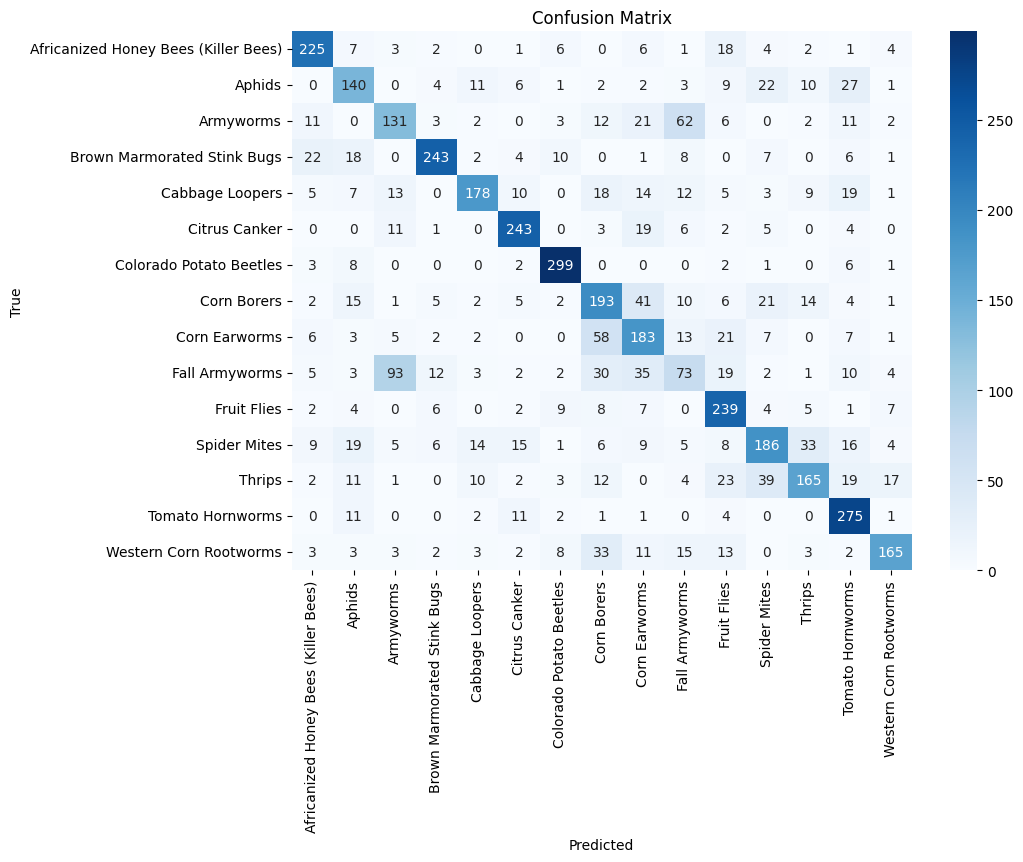

Classification Report:
                                       precision    recall  f1-score   support

Africanized Honey Bees (Killer Bees)       0.76      0.80      0.78       280
                              Aphids       0.56      0.59      0.57       238
                           Armyworms       0.49      0.49      0.49       266
         Brown Marmorated Stink Bugs       0.85      0.75      0.80       322
                     Cabbage Loopers       0.78      0.61      0.68       294
                       Citrus Canker       0.80      0.83      0.81       294
             Colorado Potato Beetles       0.86      0.93      0.90       322
                         Corn Borers       0.51      0.60      0.55       322
                       Corn Earworms       0.52      0.59      0.56       308
                      Fall Armyworms       0.34      0.25      0.29       294
                         Fruit Flies       0.64      0.81      0.71       294
                        Spider Mites   

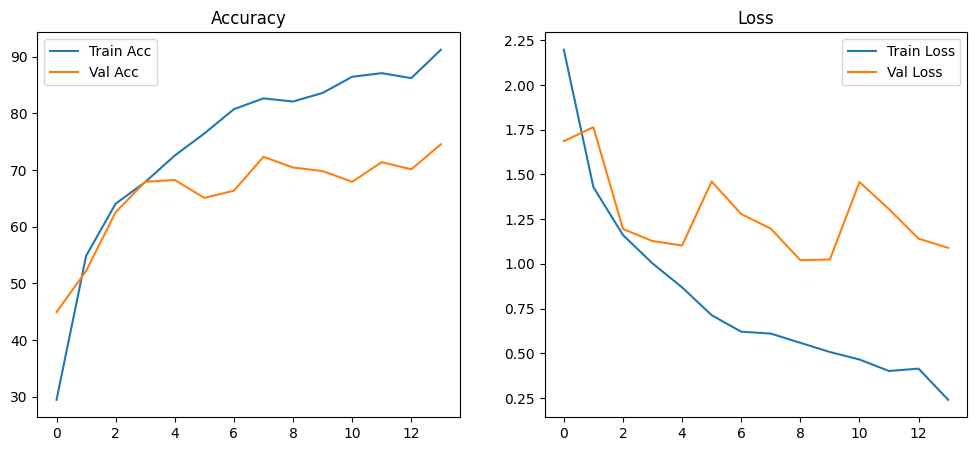

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader, WeightedRandomSampler
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
from tqdm import tqdm

# ✅ Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Transforms
train_transform = transforms.Compose([
    transforms.Resize((340, 340)),
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(0.2, 0.2, 0.2, 0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((340, 340)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# ✅ Dataset
train_dataset = ImageFolder("/kaggle/working/train", transform=train_transform)
val_dataset = ImageFolder("/kaggle/working/val", transform=val_transform)

# ✅ Class balancing
class_counts = np.array([sum(1 for label in train_dataset.targets if label == i) for i in range(len(train_dataset.classes))])
class_weights = 1. / torch.tensor(class_counts, dtype=torch.float)
sample_weights = [class_weights[label] for label in train_dataset.targets]
sampler = WeightedRandomSampler(sample_weights, len(sample_weights), replacement=True)

train_loader = DataLoader(train_dataset, batch_size=16, sampler=sampler, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=2)

num_classes = len(train_dataset.classes)

# ✅ VGG19 Model
model = models.vgg19(weights=models.VGG19_Weights.DEFAULT)
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
model = model.to(device)

# ✅ Loss, Optimizer, Scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=5e-5, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.1)
scaler = torch.cuda.amp.GradScaler() if torch.cuda.is_available() else None

# ✅ Training Function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=30, scheduler=None, patience=5):
    train_acc, val_acc, train_loss, val_loss = [], [], [], []
    best_val_loss = float('inf')
    epochs_since_improvement = 0
    all_preds, all_labels = [], []

    for epoch in range(num_epochs):
        model.train()
        running_loss, correct, total = 0, 0, 0
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()

            if scaler:
                with torch.amp.autocast('cuda'):
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                scaler.scale(loss).backward()
                scaler.unscale_(optimizer)
                torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
                scaler.step(optimizer)
                scaler.update()
            else:
                outputs = model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        train_acc.append(100 * correct / total)
        train_loss.append(running_loss / len(train_loader))

        # ✅ Validation
        model.eval()
        val_running_loss, val_correct, val_total = 0, 0, 0
        epoch_preds, epoch_labels = [], []
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                if scaler:
                    with torch.amp.autocast('cuda'):
                        outputs = model(images)
                        loss = criterion(outputs, labels)
                else:
                    outputs = model(images)
                    loss = criterion(outputs, labels)

                val_running_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                val_correct += (predicted == labels).sum().item()
                val_total += labels.size(0)
                epoch_preds.extend(predicted.cpu().numpy())
                epoch_labels.extend(labels.cpu().numpy())

        val_acc.append(100 * val_correct / val_total)
        val_loss.append(val_running_loss / len(val_loader))

        print(f"Epoch {epoch+1}: Train Acc: {train_acc[-1]:.2f}%, Val Acc: {val_acc[-1]:.2f}%, Train Loss: {train_loss[-1]:.4f}, Val Loss: {val_loss[-1]:.4f}")

        all_preds.extend(epoch_preds)
        all_labels.extend(epoch_labels)

        if val_loss[-1] < best_val_loss:
            best_val_loss = val_loss[-1]
            epochs_since_improvement = 0
            torch.save(model.state_dict(), 'vgg19_best.pth')
        else:
            epochs_since_improvement += 1
            if epochs_since_improvement >= patience:
                print("Early stopping.")
                break

        if scheduler:
            scheduler.step(val_loss[-1])

    # ✅ Evaluation
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    print("Classification Report:\n", classification_report(all_labels, all_preds, target_names=train_dataset.classes))

    return train_acc, val_acc, train_loss, val_loss

# ✅ Train Model
train_acc, val_acc, train_loss, val_loss = train_model(model, train_loader, val_loader, criterion, optimizer, scheduler=scheduler)

# ✅ Plot Accuracy and Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label="Train Acc")
plt.plot(val_acc, label="Val Acc")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Val Loss")
plt.title("Loss")
plt.legend()
plt.show()


Epoch 1: Train Acc: 24.35%, Val Acc: 47.48%, Train Loss: 2.5589, Val Loss: 2.3621


Epoch 2: Train Acc: 51.70%, Val Acc: 59.12%, Train Loss: 2.1351, Val Loss: 1.8453


Epoch 3: Train Acc: 63.12%, Val Acc: 65.09%, Train Loss: 1.6598, Val Loss: 1.4746


Epoch 4: Train Acc: 67.57%, Val Acc: 70.13%, Train Loss: 1.3374, Val Loss: 1.2109


Epoch 5: Train Acc: 73.20%, Val Acc: 73.27%, Train Loss: 1.0869, Val Loss: 1.0265


Epoch 6: Train Acc: 78.43%, Val Acc: 74.21%, Train Loss: 0.8571, Val Loss: 0.8942


Epoch 7: Train Acc: 80.17%, Val Acc: 75.79%, Train Loss: 0.7310, Val Loss: 0.7984


Epoch 8: Train Acc: 83.43%, Val Acc: 77.04%, Train Loss: 0.6299, Val Loss: 0.7573


Epoch 9: Train Acc: 83.35%, Val Acc: 76.73%, Train Loss: 0.5576, Val Loss: 0.7146


Epoch 10: Train Acc: 87.55%, Val Acc: 75.79%, Train Loss: 0.4589, Val Loss: 0.7064


Epoch 11: Train Acc: 88.74%, Val Acc: 77.36%, Train Loss: 0.4090, Val Loss: 0.7005


Epoch 12: Train Acc: 89.53%, Val Acc: 76.42%, Train Loss: 0.3615, Val Loss: 0.7071


Epoch 13: Train Acc: 90.40%, Val Acc: 77.04%, Train Loss: 0.3294, Val Loss: 0.6701


Epoch 14: Train Acc: 92.39%, Val Acc: 77.67%, Train Loss: 0.2916, Val Loss: 0.7097


Epoch 15: Train Acc: 93.26%, Val Acc: 78.93%, Train Loss: 0.2440, Val Loss: 0.7035


Epoch 16: Train Acc: 93.34%, Val Acc: 77.67%, Train Loss: 0.2280, Val Loss: 0.7014


Epoch 17: Train Acc: 92.86%, Val Acc: 79.25%, Train Loss: 0.2290, Val Loss: 0.7177


Epoch 18: Train Acc: 93.18%, Val Acc: 79.25%, Train Loss: 0.2320, Val Loss: 0.6903
Early stopping.


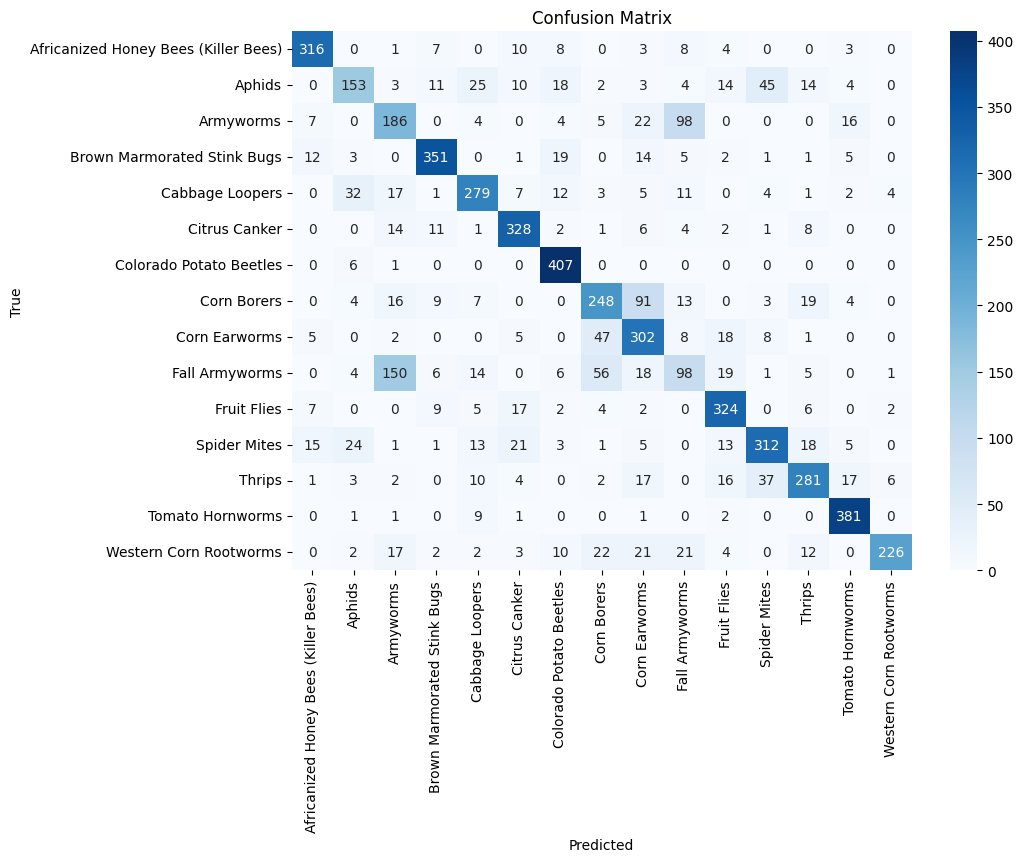

Classification Report:
                                       precision    recall  f1-score   support

Africanized Honey Bees (Killer Bees)       0.87      0.88      0.87       360
                              Aphids       0.66      0.50      0.57       306
                           Armyworms       0.45      0.54      0.49       342
         Brown Marmorated Stink Bugs       0.86      0.85      0.85       414
                     Cabbage Loopers       0.76      0.74      0.75       378
                       Citrus Canker       0.81      0.87      0.84       378
             Colorado Potato Beetles       0.83      0.98      0.90       414
                         Corn Borers       0.63      0.60      0.62       414
                       Corn Earworms       0.59      0.76      0.67       396
                      Fall Armyworms       0.36      0.26      0.30       378
                         Fruit Flies       0.78      0.86      0.81       378
                        Spider Mites   

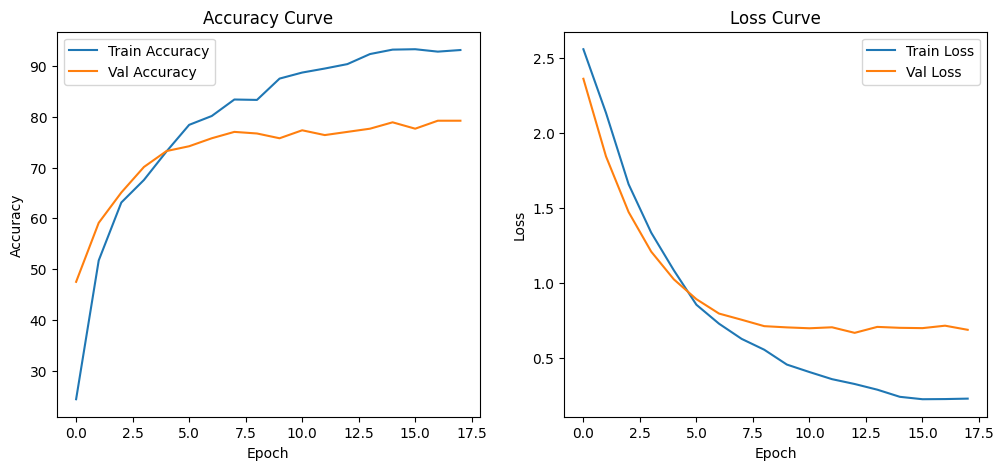

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, WeightedRandomSampler
from torchvision import transforms, datasets
from torchvision.models import efficientnet_b2, EfficientNet_B2_Weights
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
from tqdm import tqdm

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Image transforms
train_transform = transforms.Compose([
    transforms.Resize((340, 340)),
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(0.2, 0.2, 0.2, 0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((340, 340)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder("/kaggle/working/train", transform=train_transform)
val_dataset = datasets.ImageFolder("/kaggle/working/val", transform=val_transform)

# Weighted sampler to handle class imbalance
class_counts = np.bincount(train_dataset.targets)
class_weights = 1. / torch.tensor(class_counts, dtype=torch.float)
sample_weights = [class_weights[label] for label in train_dataset.targets]
sampler = WeightedRandomSampler(sample_weights, len(sample_weights), replacement=True)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=16, sampler=sampler, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=4)

num_classes = len(train_dataset.classes)

# Load pretrained EfficientNetB2
weights = EfficientNet_B2_Weights.DEFAULT
model = efficientnet_b2(weights=weights)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
model = model.to(device)

# Loss, optimizer, and scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=5e-5, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.1)
scaler = torch.amp.GradScaler()  # ✅ Corrected

# Training loop
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=30, scheduler=None, patience=5):
    train_acc, val_acc, train_loss, val_loss = [], [], [], []
    best_val_loss = float('inf')
    patience_counter = 0
    all_preds, all_labels = [], []

    for epoch in range(num_epochs):
        model.train()
        running_loss, correct, total = 0, 0, 0
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()

            with torch.amp.autocast(device_type='cuda'):  # ✅ Updated autocast
                outputs = model(images)
                loss = criterion(outputs, labels)

            scaler.scale(loss).backward()
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            scaler.step(optimizer)
            scaler.update()

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (preds == labels).sum().item()

        epoch_train_acc = 100 * correct / total
        epoch_train_loss = running_loss / len(train_loader)
        train_acc.append(epoch_train_acc)
        train_loss.append(epoch_train_loss)

        # Validation
        model.eval()
        running_loss, correct, total = 0, 0, 0
        epoch_preds, epoch_labels = [], []

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)

                with torch.amp.autocast(device_type='cuda'):  # ✅ Updated autocast
                    outputs = model(images)
                    loss = criterion(outputs, labels)

                running_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (preds == labels).sum().item()
                epoch_preds.extend(preds.cpu().numpy())
                epoch_labels.extend(labels.cpu().numpy())

        epoch_val_acc = 100 * correct / total
        epoch_val_loss = running_loss / len(val_loader)
        val_acc.append(epoch_val_acc)
        val_loss.append(epoch_val_loss)

        print(f"Epoch {epoch+1}: Train Acc: {epoch_train_acc:.2f}%, Val Acc: {epoch_val_acc:.2f}%, Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}")

        all_preds.extend(epoch_preds)
        all_labels.extend(epoch_labels)

        if epoch_val_loss < best_val_loss:
            best_val_loss = epoch_val_loss
            patience_counter = 0
            torch.save(model.state_dict(), 'efficientnetb2_best.pth')
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping.")
                break

        if scheduler:
            scheduler.step(epoch_val_loss)

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=train_dataset.classes,
                yticklabels=train_dataset.classes)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    print("Classification Report:\n", classification_report(all_labels, all_preds, target_names=train_dataset.classes))

    return train_acc, val_acc, train_loss, val_loss

# Train and evaluate
train_acc, val_acc, train_loss, val_loss = train_model(model, train_loader, val_loader, criterion, optimizer, scheduler=scheduler)

# Plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1: Train Acc: 34.50%, Val Acc: 55.03%, Train Loss: 2.0863, Val Loss: 1.5370


Epoch 2: Train Acc: 64.47%, Val Acc: 62.58%, Train Loss: 1.2002, Val Loss: 1.2100


Epoch 3: Train Acc: 72.64%, Val Acc: 67.61%, Train Loss: 0.9113, Val Loss: 1.0919


Epoch 4: Train Acc: 79.38%, Val Acc: 72.33%, Train Loss: 0.6781, Val Loss: 1.0621


Epoch 5: Train Acc: 81.52%, Val Acc: 71.70%, Train Loss: 0.5994, Val Loss: 1.0379


Epoch 6: Train Acc: 86.36%, Val Acc: 74.53%, Train Loss: 0.4489, Val Loss: 1.0000


Epoch 7: Train Acc: 89.14%, Val Acc: 73.27%, Train Loss: 0.3566, Val Loss: 0.9192


Epoch 8: Train Acc: 89.93%, Val Acc: 72.33%, Train Loss: 0.3146, Val Loss: 1.0329


Epoch 9: Train Acc: 92.70%, Val Acc: 71.07%, Train Loss: 0.2426, Val Loss: 1.1176


Epoch 10: Train Acc: 92.07%, Val Acc: 75.79%, Train Loss: 0.2489, Val Loss: 0.9747


Epoch 11: Train Acc: 92.78%, Val Acc: 77.04%, Train Loss: 0.2331, Val Loss: 0.9357


Epoch 12: Train Acc: 95.56%, Val Acc: 76.10%, Train Loss: 0.1572, Val Loss: 0.9468
Early stopping triggered after 12 epochs.


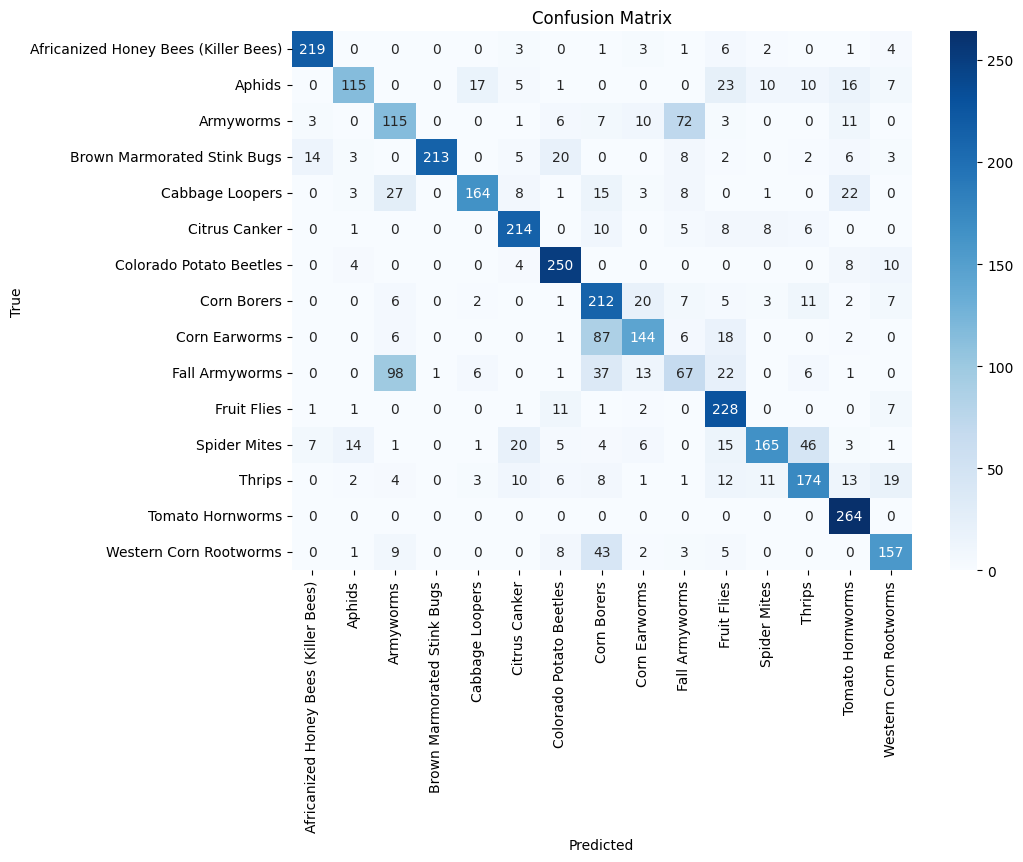

Classification Report:
                                       precision    recall  f1-score   support

Africanized Honey Bees (Killer Bees)       0.90      0.91      0.90       240
                              Aphids       0.80      0.56      0.66       204
                           Armyworms       0.43      0.50      0.47       228
         Brown Marmorated Stink Bugs       1.00      0.77      0.87       276
                     Cabbage Loopers       0.85      0.65      0.74       252
                       Citrus Canker       0.79      0.85      0.82       252
             Colorado Potato Beetles       0.80      0.91      0.85       276
                         Corn Borers       0.50      0.77      0.60       276
                       Corn Earworms       0.71      0.55      0.62       264
                      Fall Armyworms       0.38      0.27      0.31       252
                         Fruit Flies       0.66      0.90      0.76       252
                        Spider Mites   

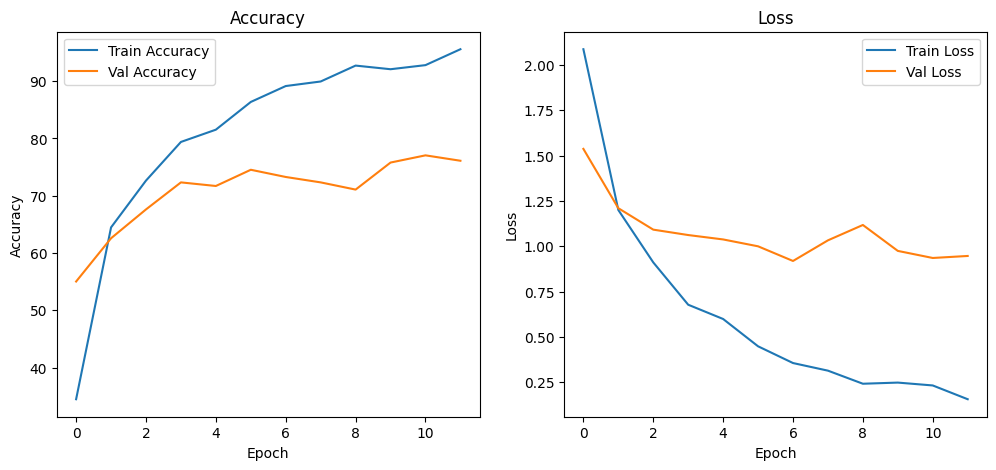

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, WeightedRandomSampler
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch.amp
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Define Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define Transformations
train_transform = transforms.Compose([
    transforms.Resize((340, 340)),  # Increased image size
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((340, 340)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load Dataset
train_dataset = ImageFolder("/kaggle/working/train", transform=train_transform)
val_dataset = ImageFolder("/kaggle/working/val", transform=val_transform)

# Class balancing
class_counts = np.array([sum(1 for label in train_dataset.targets if label == i) for i in range(len(train_dataset.classes))])
class_weights = 1. / torch.tensor(class_counts, dtype=torch.float)
sample_weights = [class_weights[label] for label in train_dataset.targets]
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

train_loader = DataLoader(train_dataset, batch_size=16, sampler=sampler, num_workers=4)  # Reduced batch size
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=4)  # Reduced batch size

num_classes = len(train_dataset.classes)

# Define Hybrid Model 5
class HybridModel5(nn.Module):
    def __init__(self, num_classes):
        super(HybridModel5, self).__init__()

        # Load Pretrained Models
        self.inception = models.inception_v3(weights=models.Inception_V3_Weights.DEFAULT, aux_logits=True) # Keep aux_logits as True
        self.resnet = models.resnet101(weights=models.ResNet101_Weights.DEFAULT)
        self.vgg19 = models.vgg19(weights=models.VGG19_Weights.DEFAULT)
        self.efficientnet = models.efficientnet_b2(weights=models.EfficientNet_B2_Weights.DEFAULT)

        # Unfreeze last few layers for fine-tuning
        for param in self.inception.parameters():
            param.requires_grad = False
        for param in self.inception.Mixed_7c.parameters():
            param.requires_grad = True

        for param in self.resnet.parameters():
            param.requires_grad = False
        for param in self.resnet.layer4.parameters():
            param.requires_grad = True

        for param in self.vgg19.parameters():
            param.requires_grad = False
        for param in self.vgg19.features[30:].parameters():  # Last Conv Layer
            param.requires_grad = True

        for param in self.efficientnet.parameters():
            param.requires_grad = False
        # Corrected line: Access the blocks directly
        for param in self.efficientnet.features[-3:].parameters():
            param.requires_grad = True

        # Modify Classifiers
        self.inception.fc = nn.Sequential(
            nn.BatchNorm1d(2048),
            nn.Dropout(0.5),
            nn.Linear(2048, 1024),
            nn.ReLU(),
        )
        self.resnet.fc = nn.Sequential(
            nn.BatchNorm1d(2048),
            nn.Dropout(0.5),
            nn.Linear(2048, 1024),
            nn.ReLU(),
        )
        self.vgg19.classifier = nn.Sequential(  # Redefined classifier
            nn.Linear(25088, 2048),  # Corrected input size for VGG19
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(2048, 1024),
            nn.ReLU(),
        )
        self.efficientnet.classifier = nn.Sequential(
            nn.BatchNorm1d(1408),
            nn.Dropout(0.5),
            nn.Linear(1408, 1024),
            nn.ReLU(),
        )

        # Fully Connected Layer
        self.fc = nn.Sequential(
            nn.Linear(1024 * 4, num_classes),  # Adjusted input features
        )

    def forward(self, x):
        x1 = self.inception(x)
        if isinstance(x1, tuple):
            x1 = x1[0] #Use the first output
        x2 = self.resnet(x)
        x3 = self.vgg19(x)
        x4 = self.efficientnet(x)

        x = torch.cat([x1, x2, x3, x4], dim=1)
        x = self.fc(x)
        return x

# Initialize Model
model5 = HybridModel5(num_classes).to(device)

# Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model5.parameters(), lr=0.00005, weight_decay=0.0001) # Changed Optimizer
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.1, verbose=True) # Learning rate scheduler

# Use mixed precision
scaler = torch.amp.GradScaler()

# Training Function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=30, scheduler=None, patience=5): # Added scheduler, increased epochs, and early stopping patience
    train_acc, val_acc, train_loss, val_loss = [], [], [], []
    best_val_loss = float('inf')
    epochs_since_improvement = 0

    # Initialize confusion matrix lists
    all_preds = []
    all_labels = []

    for epoch in range(num_epochs):
        model.train()
        correct, total, running_loss = 0, 0, 0

        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()

            # Use mixed precision
            with torch.amp.autocast('cuda'):
                outputs = model(images)
                loss = criterion(outputs, labels)

            scaler.scale(loss).backward()
            scaler.unscale_(optimizer)  # Unscale before gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient clipping
            scaler.step(optimizer)
            scaler.update()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_acc.append(100 * correct / total)
        train_loss.append(running_loss / len(train_loader))

        # Validation
        model.eval()
        correct, total, running_loss = 0, 0, 0
        epoch_preds = []
        epoch_labels = []
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                with torch.amp.autocast('cuda'):
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                running_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

                # Collect predictions and labels for confusion matrix
                epoch_preds.extend(predicted.cpu().numpy())
                epoch_labels.extend(labels.cpu().numpy())

        val_acc.append(100 * correct / total)
        val_loss.append(running_loss / len(val_loader))

        print(f"Epoch {epoch+1}: Train Acc: {train_acc[-1]:.2f}%, Val Acc: {val_acc[-1]:.2f}%, Train Loss: {train_loss[-1]:.4f}, Val Loss: {val_loss[-1]:.4f}")

        # Append the results for confusion matrix calculation
        all_preds.extend(epoch_preds)
        all_labels.extend(epoch_labels)

        # Early stopping
        if val_loss[-1] < best_val_loss:
            best_val_loss = val_loss[-1]
            epochs_since_improvement = 0
            torch.save(model.state_dict(), 'best_model.pth')  # Save the best model
        else:
            epochs_since_improvement += 1
            if epochs_since_improvement >= patience:
                print(f"Early stopping triggered after {epoch+1} epochs.")
                break

        if scheduler:
            scheduler.step(val_loss[-1]) # Update Learning Rate
    # Confusion Matrix after all epochs
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Classification Report
    print("Classification Report:\n", classification_report(all_labels, all_preds, target_names=train_dataset.classes))

    return train_acc, val_acc, train_loss, val_loss

# Train Hybrid Model 5
train_acc, val_acc, train_loss, val_loss = train_model(model5, train_loader, val_loader, criterion, optimizer, num_epochs=30, scheduler=scheduler)

# Plot Accuracy & Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss")
plt.legend()
plt.show()

In [ ]:
import os
os._exit(00)